# Probability

## Introduction

In this notebook we will discuss some concepts associated with characterising **uncertainty** in an environment **stochastically**, in other words, with the aid of **probability**. 

Probabilistic reasoning is of interest to us because in machine learning we need to make statements about the world having made only limited observations of it - in other words we are seeking to characterise an environment of which we are uncertain. One way of doing this is by supposing that our data is drawn from a **probability distribution**, after which we seek to learn characteristics of these distributions and then use them to develop models of the world 

This notebook covers much of the same content as the accompanying **Probability** lecture, but in a format which is meant to be a more interactive.

## Imports & Formatting

Please do not change the cell below, where you will see a number of imports. All of these packages are relevant for the notebook and it is important that you get used to them. 
You can find more information in their respective documentations.

In [1]:
#Standard Python libraries for data and visualisation
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import scipy as sp
import math as mt
import ipywidgets as widgets

#Import plotting tools from matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

#Import probability distributions from scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import multivariate_normal
from scipy.special import comb

#Import basic math tools from math
from math import factorial as fac
from math import sqrt

#Import interat from ipywidgets
from ipywidgets import interact

In [2]:
#Check library compatibilities
from platform import python_version

python_tested = '3.11.5'
numpy_tested = '1.24.3'
matplotlib_tested = '3.7.2'
scipy_tested = '1.11.1'
ipywidgets_tested = '8.0.4'

print('Version compatibility checks: \n')

if python_tested != python_version():
    print('Python version DISCREPANCY: Running ' + python_version() + '. Expected ' + python_tested)
else:
    print('Python version compatible: Running ' + python_version())
if numpy_tested != np.__version__:
    print('Numpy version DISCREPANCY: Running ' + np.__version__ + '. Expected ' + np_tested)
else:
    print('Numpy version compatible: Running ' + np.__version__)
if matplotlib_tested != mpl.__version__:
    print('Matplotlib version DISCREPANCY: Running ' + mpl.__version__ + '. Expected ' + matplotlib_tested)
else:
    print('Matplotlib version compatible: Running ' + mpl.__version__)
if scipy_tested != sp.__version__:
    print('Scipy version DISCREPANCY: Running ' + sp.__version__ + '. Expected ' + scipy_tested)
else:
    print('Scipy version compatible: Running ' + sp.__version__)
if ipywidgets_tested != widgets.__version__:
    print('Ipywidgets version DISCREPANCY: Running ' + widgets.__version__ + '. Expected ' + ipywidgets_tested)
else:
    print('Ipywidgets version compatible: Running ' + widgets.__version__)

Version compatibility checks: 

Python version compatible: Running 3.11.5
Numpy version compatible: Running 1.24.3
Matplotlib version compatible: Running 3.7.2
Scipy version compatible: Running 1.11.1
Ipywidgets version compatible: Running 8.0.4


Please save the attached `.css` file as `styles/custom.css`, and run the following cell in order to retain notebook formatting.

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

Please run the cell below if you wish to collapse code segments and improve readability of the notebook. 

If, after this, you wish to display all code segments again click on the cell below, then click on the menu at the top of the notebook, select the `Cell` menu, then select `Current Outputs` and select `Clear`.

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>

## Contents

[**1. Probability Basics**](#section_Basics)

[**2. Random Variables & Distributions**](#section_RV)

[**3. Population Statistics & Common Probability Distributions**](#section_PopStats)

[**4. The Mutivariate Gaussian Revisited**](#section_MVG)

[**5. Concentration Inequalities & Limit Theorems**](#section_ConcInequality)

[**6. Sample Statistics**](#section_SampleStats)

[**A. Python Function Summary**](#section_Numpy)

<a id='section_Basics'></a>
## 1. Probability Basics

**Probability** is a quantification of the uncertainty, in some sense, surrounding the occurence of some **event**.

### Probability Space
Formally we define a **probability space**, $(\Omega, \mathcal{F}, \mathbb{P})$:
- $\Omega$ is a **sample space** of possible outcomes
- $\mathcal{F}$ is an **event space** which is a set of **events**, where an event is a subset of $\Omega$
- $\mathbb{P}$ is a **probability measure** which is a mapping from $\mathcal{F}$ which satisfies the **Probability Axioms**:

### Probability Axioms
1. The probability of an event, $E$, is a non-negative real number:

\begin{equation*}
    \mathbb{P}(E) \in \mathbb{R}, \qquad \mathbb{P}(E) \geq 0, \qquad \forall E \in \mathcal{F}
\end{equation*}

2. $\mathbb{P}(\Omega) = 1$

3. For any countable collection of disjoint events, $\{ E_i \}_{i=1}^n$:

\begin{equation*}
    \mathbb{P}\left( \bigcup_{i} E_i \right) = \sum_{i=1}^n \mathbb{P} (E_i )
\end{equation*}

### Consequences of Axioms
1. $\mathbb{P}(A^{C}) = 1 - \mathbb{P}(A) \quad$ where: $\quad A^{C} = \Omega \backslash A$

2. If $A$ and $B$ are events, and $B \subseteq A$, then $\mathbb{P}(B) < \mathbb{P}(A)$

3. $0 = \mathbb{P}(\emptyset) \leq \mathbb{P}(A) \leq \mathbb{P}(\Omega) = 1$

4. $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$

3. **Union Bound** if $\{ E_i \}_{i=1}^n$ is a countable set of events, disjoint or not:

\begin{equation*}
    \mathbb{P}\left( \bigcup_{i} E_i \right) \leq \sum_{i=1}^n \mathbb{P} (E_i )
\end{equation*}

### Conditional Probability & Bayes' Rule
The **conditional probability** of an event $A$ given an event $B$ has occurred is defined to be:

\begin{equation*}
    \mathbb{P}(A \vert B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}
\end{equation*}

From which **Bayes' Rule** follows:

\begin{equation*}
    \mathbb{P}(A \vert B) = \frac{\mathbb{P}(B \vert A)\mathbb{P}(A)}{\mathbb{P}(B)}
\end{equation*}

Here:

$\mathbb{P}(A)$ is known as the **prior**.

$\mathbb{P}(A \vert B)$ is known as the **posterior**.

$\mathbb{P}(B \vert A)$ is known as the **likelihood**.

$\mathbb{P}(B)$ is known as the **evidence**.

Let's illustrate some of these features:

<IPython.core.display.Javascript object>


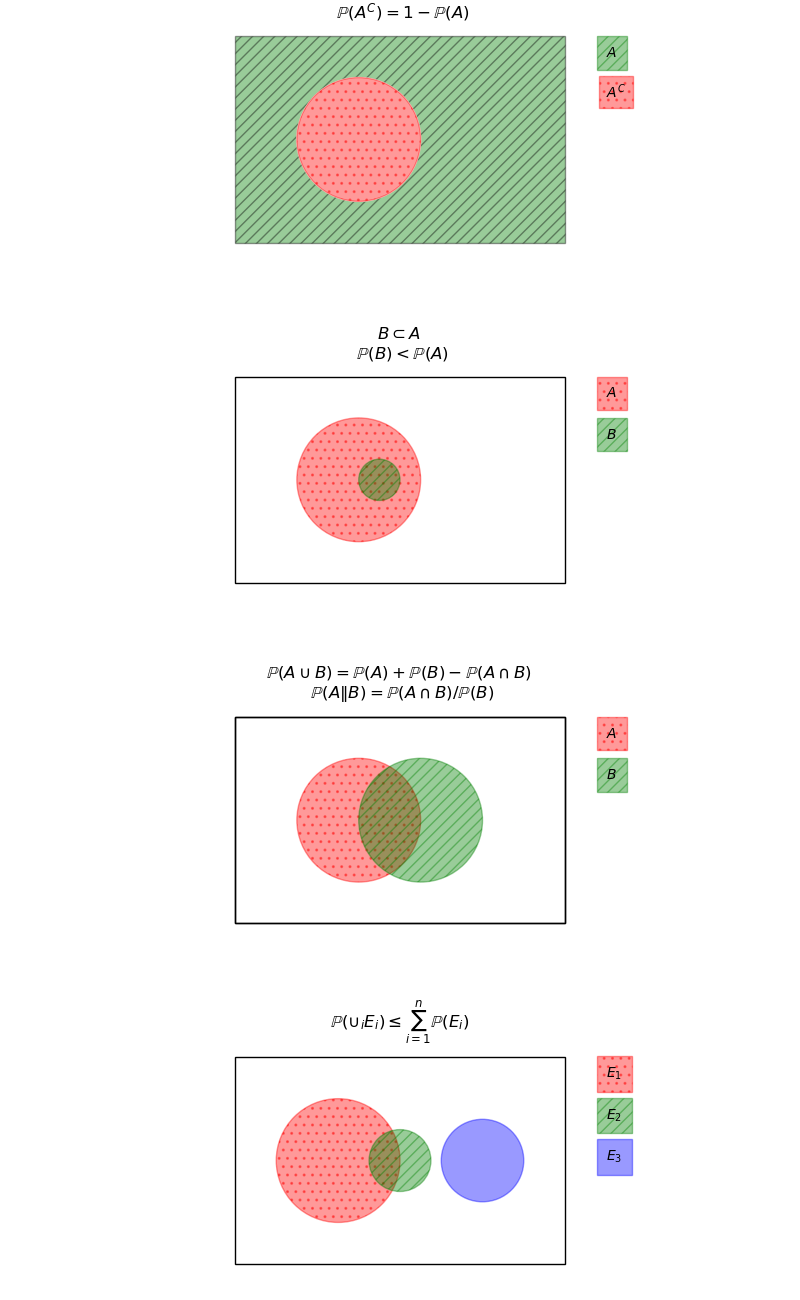

In [4]:
plt.close('all')
fig = plt.figure(figsize=(8,13))
plt.subplots_adjust(left=0.1,
                    bottom=0.02, 
                    right=0.9, 
                    top=0.98, 
                    hspace=0.5,
                    wspace=0.1)

ax = fig.add_subplot(411)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='g', lw=1, alpha=0.4, hatch='///')
circle1 = patches.Circle((5, 4.5), radius=1.5, color='w', alpha=1)
circle2 = patches.Circle((5, 4.5), radius=1.5, color='r', alpha=0.4, hatch='..')
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(11, 6.5, '$A$', bbox={'color': 'green', 'alpha': 0.4, 'pad': 7, 'hatch':'///'})
ax.text(11, 5.5, '$A^C$', bbox={'color': 'red', 'alpha': 0.4, 'pad': 5, 'hatch':'..'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$A^{C} = \Omega$ \ $A$ \n $ \mathbb{P}( A^{C} )  = 1 - \mathbb{P}(A)$')
ax.set_axis_off()


ax = fig.add_subplot(412)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none',lw=1)
circle1 = patches.Circle((5, 4.5), radius=1.5, color='r', alpha=0.4, hatch='..')
circle2 = patches.Circle((5.5, 4.5), radius=0.5, color='g', alpha=0.4, hatch='///')
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(11, 6.5, '$A$', bbox={'color': 'red', 'alpha': 0.4, 'pad': 7, 'hatch':'..'})
ax.text(11, 5.5, '$B$', bbox={'color': 'green', 'alpha': 0.4, 'pad': 7, 'hatch':'///'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$B \subset A$ \n $\mathbb{P}( B )  < \mathbb{P}(A)$')
ax.set_axis_off()


ax = fig.add_subplot(413)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none',lw=1)
circle1 = patches.Circle((5, 4.5), radius=1.5, color='r', alpha=0.4, hatch='..')
circle2 = patches.Circle((6.5, 4.5), radius=1.5, color='g', alpha=0.4, hatch='///')
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(11, 6.5, '$A$', bbox={'color': 'red', 'alpha': 0.4, 'pad': 7, 'hatch':'..'})
ax.text(11, 5.5, '$B$', bbox={'color': 'green', 'alpha': 0.4, 'pad': 7, 'hatch':'///'})
ax.add_patch(rect)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$ \mathbb{P}( A \cup B )  = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$ \n $\mathbb{P}(A \| B) = {\mathbb{P}(A \cap B)}/{\mathbb{P}(B)}$')
ax.set_axis_off()


ax = fig.add_subplot(414)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none',lw=1)
circle1 = patches.Circle((4.5, 4.5), radius=1.5, color='r', alpha=0.4, hatch='..')
circle2 = patches.Circle((6, 4.5), radius=0.75, color='g', alpha=0.4, hatch='///')
circle3 = patches.Circle((8, 4.5), radius=1, color='b', alpha=0.4, hatch='')
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.text(11, 6.5, '$E_1$', bbox={'color': 'red', 'alpha': 0.4, 'pad': 7, 'hatch':'..'})
ax.text(11, 5.5, '$E_2$', bbox={'color': 'green', 'alpha': 0.4, 'pad': 7, 'hatch':'///'})
ax.text(11, 4.5, '$E_3$', bbox={'color': 'blue', 'alpha': 0.4, 'pad': 7, 'hatch':''})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$ \mathbb{P}( {\cup}_{i} E_i ) \leq \sum_{i=1}^n \mathbb{P} (E_i )$')
ax.set_axis_off()

plt.show()

<a id='section_RV'></a>
## 2. Random Variables & Distributions

### Random Variables
A **random variable** on a probability space $(\Omega, \mathcal{F}, \mathbb{P})$ is a function:

\begin{equation}
\mathcal{X} : \Omega \rightarrow \mathbb{R}
\end{equation}

The range of $\mathcal{X}$ is given by: 

\begin{equation}
\mathcal{X}(\Omega) = \{\mathcal{X}(\omega)|\omega \in \Omega \}
\end{equation}

The probability that an outcome or **sample** associated with $\mathcal{X}$ assumes a value in a set $S \subseteq \mathbb{R}$ is written as:

\begin{equation}
\mathbb{P}(\mathcal{X} ∈ S ) = \mathbb{P}(\{\omega \in \Omega | \mathcal{X}(\omega) \in S \})
\end{equation}

The **sample space** is the set of all possible outcomes.

Now let's consider an example: 2 flips of a fair sided coin. 

In this case we can denote the sample space as:

\begin{equation}
\Omega = \{HH, TT, HT, TH \}
\end{equation}

Let's say we're interested in a random variable, $\mathcal{X}$, which is the number of heads that are the outcome of the two flips, in other words $\mathcal{X}(\omega)$ can take values of 0, 1 or 2, depending on which part of the sample space we map from.

We can illustrate this as follows:

<IPython.core.display.Javascript object>


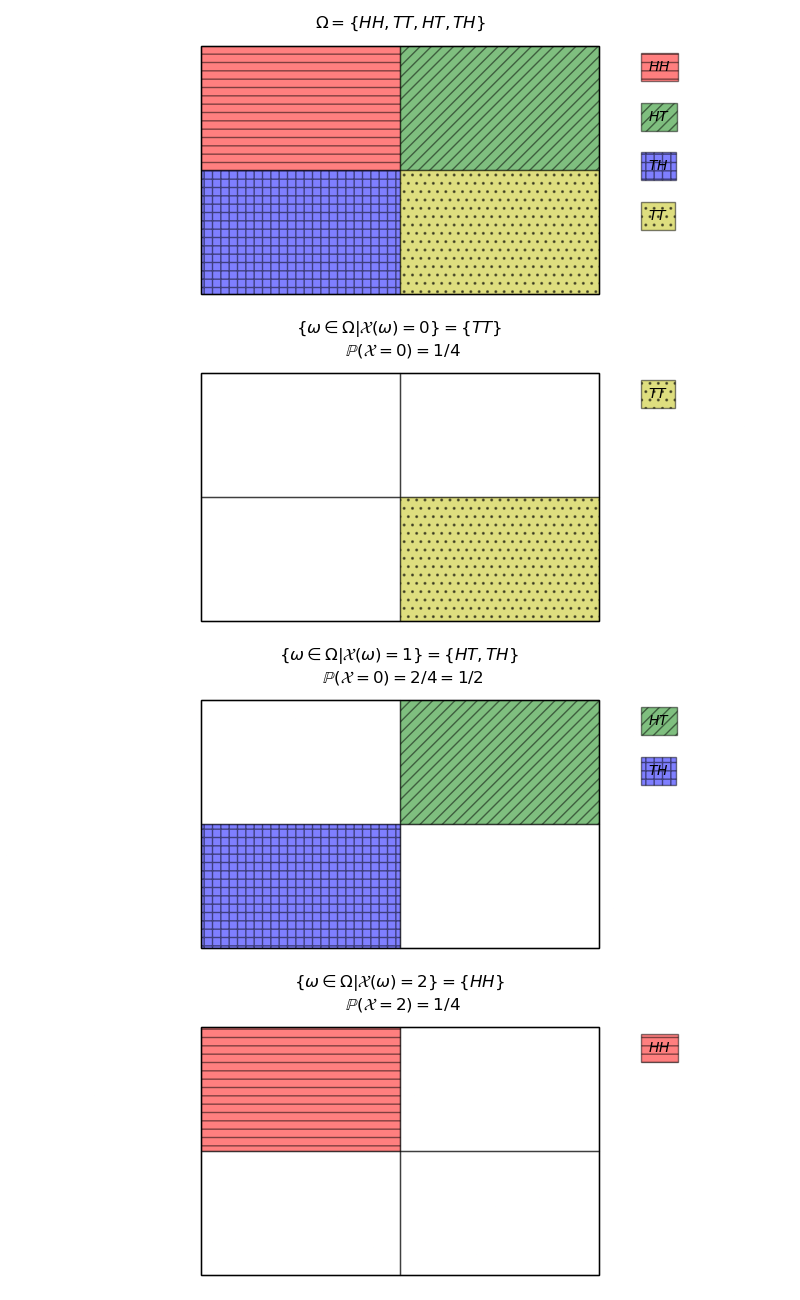

In [5]:
plt.close('all')
fig = plt.figure(figsize=(8,13))
plt.subplots_adjust(left=0.1,
                    bottom=0.02, 
                    right=0.9, 
                    top=0.98, 
                    hspace=0.5,
                    wspace=0.1)

ax = fig.add_subplot(411)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none', lw=1, alpha=1)
rect_HH = patches.Rectangle((2, 4.5), 4, 2.5,  edgecolor='black', facecolor='r', lw=1, alpha=0.5, hatch='--')
rect_HT = patches.Rectangle((6, 4.5), 4, 2.5,  edgecolor='black', facecolor='g', lw=1, alpha=0.5, hatch='///')
rect_TH = patches.Rectangle((2, 2.0), 4, 2.5,  edgecolor='black', facecolor='b', lw=1, alpha=0.5, hatch='++')
rect_TT = patches.Rectangle((6, 2.0), 4, 2.5, edgecolor='black', facecolor='y', lw=1, alpha=0.5, hatch='..')
ax.add_patch(rect_HH)
ax.add_patch(rect_HT)
ax.add_patch(rect_TH)
ax.add_patch(rect_TT)
ax.add_patch(rect)
ax.text(11, 6.5, '$HH$', bbox={'facecolor': 'r', 'alpha': 0.5, 'pad': 5, 'hatch':'--'})
ax.text(11, 5.5, '$HT$', bbox={'facecolor': 'g', 'alpha': 0.5, 'pad': 5, 'hatch':'///'})
ax.text(11, 4.5, '$TH$', bbox={'facecolor': 'b', 'alpha': 0.5, 'pad': 5, 'hatch':'++'})
ax.text(11, 3.5, '$TT$', bbox={'facecolor': 'y', 'alpha': 0.5, 'pad': 5, 'hatch':'..'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$\Omega = \{HH, TT, HT, TH \}$')
ax.set_axis_off()


ax = fig.add_subplot(412)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none', lw=1, alpha=1)
rect_HH = patches.Rectangle((2, 4.5), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_HT = patches.Rectangle((6, 4.5), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_TH = patches.Rectangle((2, 2.0), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_TT = patches.Rectangle((6, 2.0), 4, 2.5, edgecolor='black', facecolor='y',    lw=1, alpha=0.5, hatch='..')
ax.add_patch(rect_HH)
ax.add_patch(rect_HT)
ax.add_patch(rect_TH)
ax.add_patch(rect_TT)
ax.add_patch(rect)
ax.text(11, 6.5, '$TT$', bbox={'facecolor': 'y', 'alpha': 0.5, 'pad': 5, 'hatch':'..'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$\{ \omega \in \Omega | \mathcal{X}(\omega) = 0 \} = \{TT\}$ \n $\mathbb{P}(\mathcal{X} = 0) = 1/4$')
ax.set_axis_off()


ax = fig.add_subplot(413)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none', lw=1, alpha=1)
rect_HH = patches.Rectangle((2, 4.5), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_HT = patches.Rectangle((6, 4.5), 4, 2.5,  edgecolor='black', facecolor='g',    lw=1, alpha=0.5, hatch='///')
rect_TH = patches.Rectangle((2, 2.0), 4, 2.5,  edgecolor='black', facecolor='b',    lw=1, alpha=0.5, hatch='++')
rect_TT = patches.Rectangle((6, 2.0), 4, 2.5, edgecolor='black', facecolor='none', lw=1, alpha=0.5)
ax.add_patch(rect_HH)
ax.add_patch(rect_HT)
ax.add_patch(rect_TH)
ax.add_patch(rect_TT)
ax.add_patch(rect)
ax.text(11, 6.5, '$HT$', bbox={'facecolor': 'g', 'alpha': 0.5, 'pad': 5, 'hatch':'///'})
ax.text(11, 5.5, '$TH$', bbox={'facecolor': 'b', 'alpha': 0.5, 'pad': 5, 'hatch':'++'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$\{ \omega \in \Omega | \mathcal{X}(\omega) = 1 \} = \{HT, TH\}$ \n $\mathbb{P}(\mathcal{X} = 0) = 2/4 = 1/2$')
ax.set_axis_off()


ax = fig.add_subplot(414)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
rect = patches.Rectangle((2, 2), 8, 5, edgecolor='black', facecolor='none', lw=1, alpha=1)
rect_HH = patches.Rectangle((2, 4.5), 4, 2.5,  edgecolor='black', facecolor='r',    lw=1, alpha=0.5, hatch='--')
rect_HT = patches.Rectangle((6, 4.5), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_TH = patches.Rectangle((2, 2.0), 4, 2.5,  edgecolor='black', facecolor='none', lw=1, alpha=0.5)
rect_TT = patches.Rectangle((6, 2.0), 4, 2.5, edgecolor='black', facecolor='none', lw=1, alpha=0.5)
ax.add_patch(rect_HH)
ax.add_patch(rect_HT)
ax.add_patch(rect_TH)
ax.add_patch(rect_TT)
ax.add_patch(rect)
ax.text(11, 6.5, '$HH$', bbox={'facecolor': 'r', 'alpha': 0.5, 'pad': 5, 'hatch':'--'})
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.title('$\{ \omega \in \Omega | \mathcal{X}(\omega) = 2 \} = \{HH\}$ \n $\mathbb{P}(\mathcal{X} = 2) = 1/4$')
ax.set_axis_off()

plt.show()

### The Cumulative Distribution Function & the Probability Distribution
The **cumulative distribution function** (cdf) gives the probability that the outcome of a random variable is at most a particular value, $x$:
\begin{equation}
F_\mathcal{X} ( x ) = \mathbb{P}(\mathcal{X} \leq x )
\end{equation}

The complete specification of probability for the different values that samples taken from $\mathcal{X}$ can assume is called the **probability distribution** of $\mathcal{X}$ , $\mathcal{D}$ , and is characterised by some mapping, $p_\mathcal{X}$.

We say that $\mathcal{X}$ is a random variable with outcomes, $x$, sampled according to (or **drawn from**) $\mathcal{D}$ :

\begin{equation}
x \sim \mathcal{D}
\end{equation}

The precise characterisation of this function, $p_\mathcal{X}$ , depends on whether $\mathcal{X}$ is **discrete** or **continuous**.

A **discrete random variable** is a random variable that has a countable range. It is specified by its **probability mass function** (pmf), $p_{\mathcal{X}} : \mathcal{X}(\Omega) \rightarrow [ 0 , 1 ]$ , so:

\begin{align}
\mathbb{P}_{\mathcal{D}} (\mathcal{X} = x ) &= p_{\mathcal{X}} ( x ) \\
\sum_{x \in \mathcal{X}(\Omega)} p_{\mathcal{X}} ( x ) &= 1
\end{align}

For example:

<IPython.core.display.Javascript object>


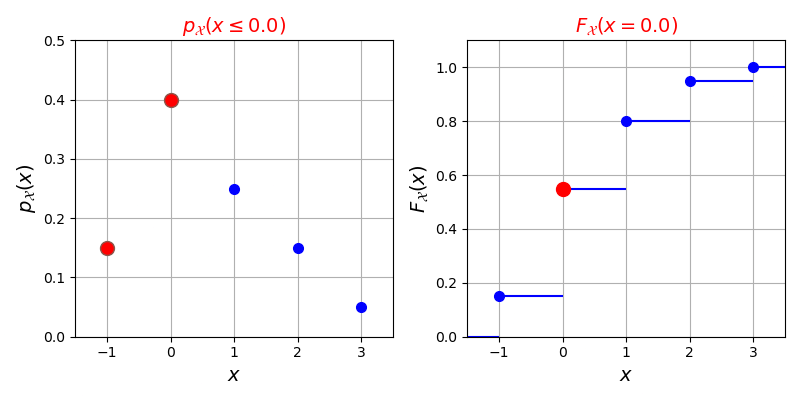

interactive(children=(FloatSlider(value=0.0, description='$x \\leq$', max=3.5, min=-1.5), Output()), _dom_clas…

In [6]:
x =  [-1.0, 0.0, 1.0, 2.0, 3.0]
px = [0.15, 0.40, 0.25, 0.15, 0.05]

plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$p_{\mathcal{X}}(x)$', fontsize=14)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$F_{\mathcal{X}}(x)$', fontsize=14)

ax1.set_xlim(-1.5, 3.5)
ax1.set_ylim(0, 0.5)
ax2.set_xlim(-1.5, 3.5)
ax2.set_ylim(0, 1.1)

ax1.grid()
ax2.grid()

ax1.plot(x[0], px[0], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax1.plot(x[1], px[1], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax1.plot(x[2], px[2], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax1.plot(x[3], px[3], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax1.plot(x[4], px[4], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")

ax2.hlines(y=sum(px[0:0]), xmin=x[0]-1, xmax=x[0], linewidth=1.5, color='b')
ax2.plot(x[0], sum(px[0:1]), marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax2.hlines(y=sum(px[0:1]), xmin=x[0], xmax=x[0]+1, linewidth=1.5, color='b')
ax2.plot(x[1], sum(px[0:2]), marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax2.hlines(y=sum(px[0:2]), xmin=x[1], xmax=x[1]+1, linewidth=1.5, color='b')
ax2.plot(x[2], sum(px[0:3]), marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax2.hlines(y=sum(px[0:3]), xmin=x[2], xmax=x[2]+1, linewidth=1.5, color='b')
ax2.plot(x[3], sum(px[0:4]), marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax2.hlines(y=sum(px[0:4]), xmin=x[3], xmax=x[3]+1, linewidth=1.5, color='b')
ax2.plot(x[4], sum(px[0:5]), marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
ax2.hlines(y=sum(px[0:5]), xmin=x[4], xmax=x[4]+1, linewidth=1.5, color='b')

point1, = ax1.plot([], [], marker="o", markersize=10, linewidth=0, markerfacecolor="r")
point2, = ax2.plot([], [], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r")

def plot_outcomes(x_leq):
    point1.set_data([], [])
    point2.set_data([x_leq], [0])
    for i in range(5):
        if x[i] <= x_leq:
            point1.set_data([x[0:i+1]], [px[0:i+1]])
            point2.set_data([x_leq], [sum(px[0:i+1])])
    title1 = r"$p_{\mathcal{X}}(x \leq$" + str(round(x_leq,1)) +"$)$"
    ax1.set_title(title1, fontsize=14, color='r')
    title2 = r"$F_{\mathcal{X}}(x =$" + str(round(x_leq,1)) +"$)$"
    ax2.set_title(title2, fontsize=14, color='r')

    plt.show()
    
int_plot = interact(plot_outcomes, 
                    x_leq = widgets.FloatSlider(value=0, min=-1.5, max=3.5, step=0.1, description = '$x \leq$')
                   )
plt.show()

A **continuous random variable** is a random variable that has a uncountable range. It is specified by its **probability density function** (pdf), $p_{\mathcal{X}} : \mathbb{R} \rightarrow [ 0 , \infty)$ , so:
\begin{align}
\mathbb{P}_{\mathcal{D}} (a \leq \mathcal{X} \leq b ) &= \int_a^b f_{\mathcal{X}} ( x ) dx \\
\int_{\infty}^{\infty} f_{\mathcal{X}} ( x ) dx &= 1
\end{align}

For example:

<IPython.core.display.Javascript object>


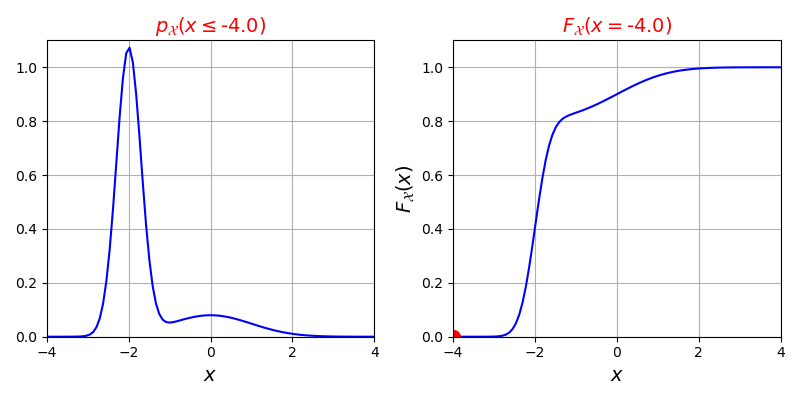

interactive(children=(FloatSlider(value=-4.0, description='$x \\leq$', max=4.0, min=-4.0), Output()), _dom_cla…

In [7]:
def Gaussian_Mixture_PDF_1d(alpha, mu1x, sig1x,
                               mu2x, sig2x,
                               xrange):
    pdf1 = alpha * norm.pdf(xrange, loc=mu1x, scale=sig1x)
    pdf2 = (1 - alpha) * norm.pdf(xrange, loc=mu2x, scale=sig2x)
    y = pdf1 + pdf2
    return y

def Gaussian_Mixture_CDF_1d(alpha, mu1x, sig1x,
                               mu2x, sig2x,
                               xrange):
    cdf1 = alpha * norm.cdf(xrange, loc=mu1x, scale=sig1x)
    cdf2 = (1 - alpha) * norm.cdf(xrange, loc=mu2x, scale=sig2x)
    y = cdf1 + cdf2
    return y

alpha = 0.2
[mu1x, sig1x] = [0, 1]
[mu2x, sig2x] = [-2, 0.3]

plt.close('all')
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$p_{\mathcal{X}}(x)$', fontsize=14)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$F_{\mathcal{X}}(x)$', fontsize=14)

ax2.set_xlim(-4.0, 4.0)
ax2.set_ylim(0, 1.1)

ax2.grid()

x_line = np.linspace(-4, 4, 100)

y_cdf = Gaussian_Mixture_CDF_1d(alpha, mu1x, sig1x,
                                   mu2x, sig2x,
                                   x_line)

ax2.plot(x_line, y_cdf, color='b')
point2, = ax2.plot([], [], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r")

def plot_outcomes(x_leq):
    ax1.clear()
    ax1.set_xlim(-4.0, 4.0)
    ax1.set_ylim(0, 1.1)
    ax1.grid()
    x_line = np.linspace(-4, 4, 100)

    y_pdf = Gaussian_Mixture_PDF_1d(alpha, mu1x, sig1x,
                                   mu2x, sig2x,
                                   x_line)
    ax1.plot(x_line, y_pdf, color='b')
    
    x_range = np.linspace(-4, x_leq, 100)
    y_pdf = Gaussian_Mixture_PDF_1d(alpha, mu1x, sig1x,
                                   mu2x, sig2x,
                                   x_range)
    y_cdf = Gaussian_Mixture_CDF_1d(alpha, mu1x, sig1x,
                                   mu2x, sig2x,
                                   x_leq)

    ax1.plot(x_range, y_pdf, color='r')    
    verts = [(-4, 0)] + list(zip(x_range, y_pdf)) + [(x_leq, 0)]
    poly = patches.Polygon(verts, facecolor = '#fee0d2', edgecolor = '#de2d26')
    ax1.add_patch(poly)
    ax1.plot([x_leq, x_leq], [0, y_pdf[-1]], color='r')
    point2.set_data([x_leq], [y_cdf])

    ax1.set_xlabel('$x$', fontsize=14)
    title1 = r"$p_{\mathcal{X}}(x \leq$" + str(round(x_leq,1)) +"$)$"
    ax1.set_title(title1, fontsize=14, color='r')
    title2 = r"$F_{\mathcal{X}}(x =$" + str(round(x_leq,1)) +"$)$"
    ax2.set_title(title2, fontsize=14, color='r')

    plt.show()
    
int_plot = interact(plot_outcomes, 
                    x_leq = widgets.FloatSlider(value=-4.0, min=-4.0, max=4.0, step=0.1, description = '$x \leq$')
                   )
plt.show()

### Joint Distributions
A **joint** or **multivariate distribution** is the probability distribution, $\mathcal{D}$, over some combination of $m$ random variables, $\{ \mathcal{X}_i \}_{i=1}^{m}$, with outcomes $\{ x_i \sim \mathcal{D}_i \}_{i=1}^m$
	
This probability distribution is characterised by some mapping, $p_{\mathcal{X}_1,...,\mathcal{X}_m}$

Generally, we express a collection of such random variables as a **random vector**, $\boldsymbol{\mathcal{X}}$, with outcomes, $\mathbf{x}$ so that:
\begin{equation}	
    \boldsymbol{\mathcal{X}} = \begin{bmatrix}
    \mathcal{X}_{1} \\
    \mathcal{X}_{2} \\
    \vdots \\
    \mathcal{X}_{m}
    \end{bmatrix};
    \qquad
    \mathbf{x} = \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_m
    \end{bmatrix}
\end{equation}		

### Independent Distributions
We say that 2 random variables, $\mathcal{X}$ and $\mathcal{Y}$ are **independent** if their joint distribution factors:
\begin{equation}
    p_{\mathcal{X},\mathcal{Y}}(\cdot, \cdot) = p_{\mathcal{X}}(\cdot) p_{\mathcal{Y}}(\cdot)
\end{equation}

In general, if $\mathcal{X}_1,...,\mathcal{X}_m$ are independent, then:
\begin{equation*}
    p_{\mathcal{X}_1,...,\mathcal{X}_m}(\cdot,...,\cdot) = \prod_{i=1}^m p_{\mathcal{X}_i}(\cdot)
\end{equation*}

A collection of random variables is **independent and identically distributed** (**i.i.d.**) if each random variable has the same probability distribution as the others and all are mutually independent.

If a collection of random variables, $\mathcal{X}_1,...,\mathcal{X}_m$, are i.i.d., then I often write the following short-hand as notation for their joint distribution:
\begin{equation}
    p_{\mathcal{X}_1,...,\mathcal{X}_m}(\cdot,...,\cdot) = p_{\mathcal{X}}(\cdot,...,\cdot)
\end{equation}

### Marginal Distribution
If we have a joint distribution over a set of random variables then we can obtain a **marginal distribution** for a subset of them by summing out the redundant variable:

For two discrete random variables, $\mathcal{X}$, $\mathcal{Y}$:
\begin{equation}
    p_{\mathcal{X}}(x) = \sum_{y \in \mathcal{Y}(\Omega)} p_{\mathcal{X},\mathcal{Y}}(x,y)
\end{equation}

For two continuous random variables, $\mathcal{X}$, $\mathcal{Y}$:
\begin{equation}
    f_{\mathcal{X}}(x) = \int_{\mathcal{Y}(\Omega)} f_{\mathcal{X},\mathcal{Y}}(x,y) dy
\end{equation}


If we have a joint distribution over some combination of random variables, $\mathcal{X}, \mathcal{Y}$, then we can obtain the distribution of $\mathcal{X}$ \textbf{conditional} on an outcome of $\mathcal{Y}$ as follows: 
	
### Conditional Distribution
For two discrete random variables, $\mathcal{X}$, $\mathcal{Y}$:
\begin{equation}
    p_{\mathcal{X}}(x \vert y) = \frac{p_{\mathcal{X},\mathcal{Y}}(x,y)}{\sum_{x \in \mathcal{X}(\Omega)} p_{\mathcal{X},\mathcal{Y}}(x,y)}
\end{equation}

For two continuous random variables, $\mathcal{X}$, $\mathcal{Y}$:
\begin{equation}
    f_{\mathcal{X}}(x \vert y) = \frac{f_{\mathcal{X},\mathcal{Y}}(x,y)}{\int_{\mathcal{X}(\Omega)} f_{\mathcal{X},\mathcal{Y}}(x,y) dx}
\end{equation}

Let's illustrate joint, marginal and conditional distributions with the following **bivariate**, jointly continuous pdf:

<IPython.core.display.Javascript object>


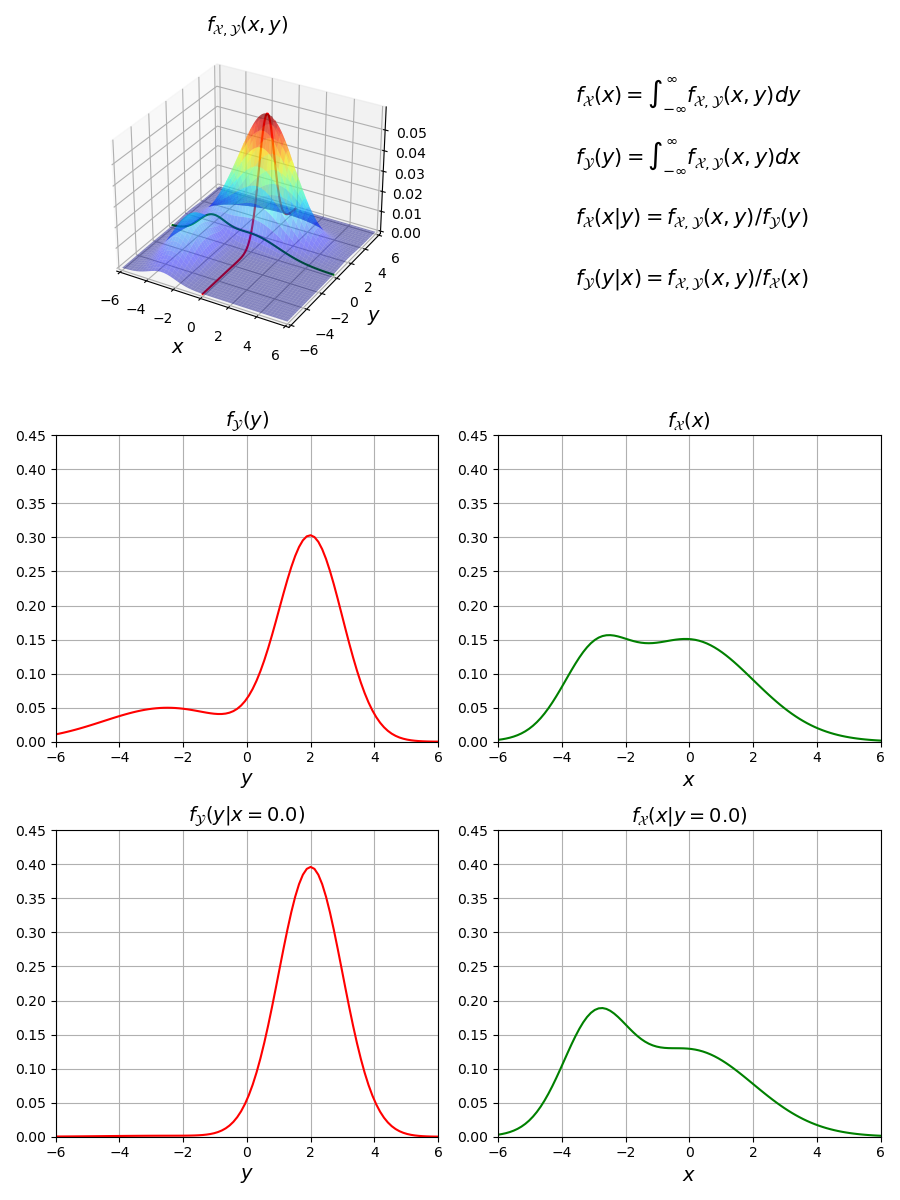

interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=0.0, descr…

In [8]:
def Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                            mu2x, mu2y, sig2x, sig2y,
                            xrange, yrange):
    arg1 = ((xrange-mu1x)/sig1x)**2 + ((yrange-mu1y)/sig1y)**2
    pdf1 = (alpha/(2*np.pi*sig1x*sig1y)) * np.exp(-0.5*arg1)
    arg2 = ((xrange-mu2x)/sig2x)**2 + ((yrange-mu2y)/sig2y)**2
    pdf2 = ((1-alpha)/(2*np.pi*sig2x*sig2y)) * np.exp(-0.5*arg2)
    z = pdf1 + pdf2
    return z

def Gaussian_Mixture_Marginal(alpha, mu1, sig1,
                                     mu2, sig2,
                                     x_or_y):
    arg1 = ((x_or_y - mu1)/sig1)**2
    pdf1 = (alpha/(np.sqrt(2*np.pi)*sig1)) * np.exp(-0.5*arg1)
    arg2 = ((x_or_y - mu2)/sig2)**2
    pdf2 = ((1-alpha)/(np.sqrt(2*np.pi)*sig2)) * np.exp(-0.5*arg2)
    z = pdf1 + pdf2
    return z

alpha = 0.75
[mu1x, mu1y, sig1x, sig1y] = [ 0,  2, 2, 1]
[mu2x, mu2y, sig2x, sig2y] = [-3, -2.5, 1, 2]

fig = plt.figure(figsize=(9,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(3,2,1, projection="3d")
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax3.set_xlabel('$y$', fontsize=14)
ax4.set_xlabel('$x$', fontsize=14)
ax5.set_xlabel('$y$', fontsize=14)
ax6.set_xlabel('$x$', fontsize=14)

ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax3.set_xlim(-6, 6)
ax3.set_ylim(0, 0.45)
ax4.set_xlim(-6, 6)
ax4.set_ylim(0, 0.45)
ax5.set_xlim(-6, 6)
ax5.set_ylim(0, 0.45)
ax6.set_xlim(-6, 6)
ax6.set_ylim(0, 0.45)

ax1.grid()
ax2.clear()
ax2.set_axis_off()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

x_line = np.linspace(-6, 6, 100)
y_line = np.linspace(-6, 6, 100)
x, y = np.meshgrid(x_line, y_line)

z = Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                             mu2x, mu2y, sig2x, sig2y,
                             x, y)

ax1.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=0.45)
line1, = ax1.plot([], [], [], color="red")
line2, = ax1.plot([], [], [], color="green")
line5, = ax5.plot([], [], color="red")
line6, = ax6.plot([], [], color="green")

ax2.text(0.2,0.8,'$f_{\mathcal{X}}(x) = \int_{-\infty}^{\infty} f_{\mathcal{X}, \mathcal{Y}}(x, y) dy$', 
         fontsize = 15)
ax2.text(0.2,0.6,'$f_{\mathcal{Y}}(y) = \int_{-\infty}^{\infty} f_{\mathcal{X}, \mathcal{Y}}(x, y) dx$', 
         fontsize = 15)
ax2.text(0.2,0.4,'$f_{\mathcal{X}}(x | y) = f_{\mathcal{X}, \mathcal{Y}}(x, y) / f_{\mathcal{Y}}(y)$', 
         fontsize = 15)
ax2.text(0.2,0.2,'$f_{\mathcal{Y}}(y | x) = f_{\mathcal{X}, \mathcal{Y}}(x, y) / f_{\mathcal{X}}(x)$', 
         fontsize = 15)
                      
y_prob = Gaussian_Mixture_Marginal(alpha, mu1y, sig1y, mu2y, sig2y, x_or_y=y_line)
ax3.plot(y_line, y_prob, color="red")

x_prob = Gaussian_Mixture_Marginal(alpha, mu1x, sig1x, mu2x, sig2x, x_or_y=x_line)
ax4.plot(x_line, x_prob, color="green")

title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
ax1.set_title(title1, fontsize=14)
title3 = r"$f_{\mathcal{Y}}(y)$"
ax3.set_title(title3, fontsize=14)
title4 = r"$f_{\mathcal{X}}(x)$"
ax4.set_title(title4, fontsize=14)

def plot_delta_lines(x, y):
    x1_range = np.linspace(x, x, 100)
    y1_range = np.linspace(-6, 6, 100)
    z1 = Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                                 mu2x, mu2y, sig2x, sig2y,
                                 x1_range, y1_range)

    x2_range = np.linspace(-6, 6, 100)
    y2_range = np.linspace(y, y, 100)
    z2 = Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                                 mu2x, mu2y, sig2x, sig2y,
                                 x2_range, y2_range)

    line1.set_data(x1_range, y1_range)
    line1.set_3d_properties(z1)
    line2.set_data(x2_range, y2_range)
    line2.set_3d_properties(z2)

    y_vert_x = Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                             mu2x, mu2y, sig2x, sig2y,
                             x, y1_range) / Gaussian_Mixture_Marginal(alpha, mu1x, sig1x,
                                                                      mu2x, sig2x,
                                                                      x_or_y=x)
    line5.set_data(y1_range, y_vert_x)

    x_vert_y = Gaussian_Mixture(alpha, mu1x, mu1y, sig1x, sig1y,
                             mu2x, mu2y, sig2x, sig2y,
                             x2_range, y) / Gaussian_Mixture_Marginal(alpha, mu1y, sig1y,
                                                                      mu2y, sig2y,
                                                                      x_or_y=y)
    line6.set_data(x2_range, x_vert_y)

    title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
    ax1.set_title(title1, fontsize=14)
    title5 = r"$f_{\mathcal{Y}}(y | x=$" + str(round(x,1)) +"$)$"
    ax5.set_title(title5, fontsize=14)
    title6 = r"$f_{\mathcal{X}}(x | y=$" + str(round(y,1)) +"$)$"
    ax6.set_title(title6, fontsize=14)

    plt.show()

    
int_plot = interact(plot_delta_lines, 
                    x = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1),
                    y = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Check that the sketches of the marginal probability distributions for $x$ and $y$ make sense. It may help to rotate the three dimensional plot of $f_{\mathcal{X}, \mathcal{Y}}(x,y)$ to observe the joint probability distribution function from different perspectives.

2. Try picking different values for $x$ and $y$ and observe how the conditional probability curves change.

3. What do you notice about $f_{\mathcal{X}, \mathcal{Y}}(x,y)$ for constant $x$ as for $x> \sim 0$? Compare this with the behaviour of $f_{\mathcal{Y}}(y \vert x)$ as $x> \sim 0$. Can you explain your observations?  
</div>

<div class=answer>
<b>Answer:</b>
    
2. For different values for $x$ and $y$ the conditional probability curves are normalised versions of the corresponding axis-aligned cuts through the joint distribution.

3. For $x> \sim 0$ the distribution of $f_{\mathcal{Y}}(y \vert x)$ approximates the normal distribution. Looking closely at the code it becomes clear that the example distribution is a mixture of two Gaussian distributions. For $x> \sim 0$ the mixture is dominated by the more heavily weighted Gaussian, while we are in the wings of the other Gaussian. This in this area our pdf is well approximated by the more heavliy weighted Gaussian alone. This is well demonstrated by changing `alpha` in the code such that it is equal to 1. The shape of $f_{\mathcal{Y}}(y \vert x)$ in this regime does not noticeably change. 
</div>

<a id='section_PopStats'></a>
## 3. Population Statistics & Common Probability Distributions

**Population Statistics** are a handful of metrics which we use to distill information about various properties of probability distributions into a variety of parameters. Why 'population'? Because these statisctics refer to summary properties for the entire population of data outcomes.

We'll take a look at some univariate cases before moving on to the more general multivarite setting:

### <ins>Univariate Setting</ins>

### Expected Value
The **expected value** or **mean** of some random variable, $\mathcal{X}$, with outcomes, $x \sim \mathcal{D}$, is defined as:

For discrete random variables:

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = \sum_{x \in \mathcal{X}(\Omega)} x p_{\mathcal{X}}(x)
\end{equation}
		
For continuous random variables:

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = \int_{-\infty}^{\infty} x f_{\mathcal{X}}(x)dx
\end{equation}

More generally, for some function, $g$, and some random variable, $\mathcal{X}$, with outcomes, $x \sim \mathcal{D}$, the **expected value** of the random variable, $g(\mathcal{X})$, is:

For discrete random variables:

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[g(\mathcal{X})] = \sum_{x \in \mathcal{X}(\Omega)} g(x) p_{\mathcal{X}}(x)
\end{equation}
		
For continuous random variables:

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[g(\mathcal{X})] = \int_{-\infty}^{\infty} g(x) f_{\mathcal{X}}(x)dx
\end{equation}

### Variance
The **variance** of some random variable, $\mathcal{X}$, with outcomes, $x \sim \mathcal{D}$, is defined as:

\begin{align}
    \mbox{Var}_{\mathcal{D}}[\mathcal{X}] &= \mathbb{E}_{\mathcal{D}}\left[ (\mathcal{X} - \mathbb{E}_{\mathcal{D}}[\mathcal{X}])^2 \right] \\
    &= \mathbb{E}_{\mathcal{D}}[\mathcal{X}^2] - \left(\mathbb{E}_{\mathcal{D}}[\mathcal{X}]\right)^2
\end{align}

The **standard deviation** (often denoted as $\sigma$) is defined as $\sqrt{\mbox{Var}_{\mathcal{D}}[\mathcal{X}]}$

Let's illustrate some of these statistics via a considersation of some common univariate probability distributions:

### _EX 1: Bernoulli Distribution_

Here ${\mathcal{X}}$ is a discrete random variable, with outcomes, $x$, which can take one of two values: 0 or 1, with a probability that $x=1$ being equal to $\theta$

\begin{equation}
	x \sim \text{Bern}(\theta)	
\end{equation}

\begin{equation}
    p_{\mathcal{X}}(x ; \theta) = \theta^x (1-\theta)^{1-x}	
\end{equation}

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = \theta	
\end{equation}

\begin{equation}
    \text{Var}_{\mathcal{D}}[\mathcal{X}] = \theta (1-\theta)	
\end{equation}

<IPython.core.display.Javascript object>


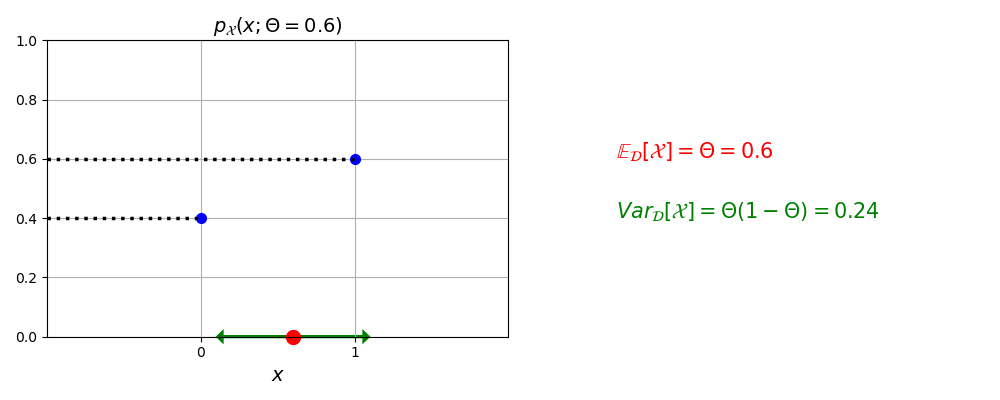

interactive(children=(FloatSlider(value=0.6, description='$\\Theta$', max=1.0), Output()), _dom_classes=('widg…

In [9]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Bern(theta):
    Exp = theta
    Var = theta * (1-theta)
    
    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(-1, 2)
    ax1.set_ylim(0, 1)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['0', '1'])

    ax2.clear()
    ax2.set_axis_off()
 
    point1, = ax1.plot([0], [1-theta], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
    point2, = ax1.plot([1], [theta], marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
    line1, = ax1.plot([-1, 0], [1-theta, 1-theta], linestyle='dotted', color='black', lw=2.5)
    line1, = ax1.plot([-1, 1], [theta, theta], linestyle='dotted', color='black', lw=2.5)
    point3, = ax1.plot([Exp], [0], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r", clip_on=False)
    ax1.arrow(Exp, 0, np.sqrt(Var), 0, head_width=0.03, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(Exp, 0, -np.sqrt(Var), 0, head_width=0.03, head_length=0.03, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)

    title1 = "$p_{\mathcal{X}}(x; \Theta =$" + str(round(theta,1)) +"$)$"
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.6, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] = \Theta = $' + str(round(Exp,1)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.4, '${Var}_{\mathcal{D}} [\mathcal{X}] = \Theta (1- \Theta) = $' + str(round(Var,2)), 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Bern, 
                    theta = widgets.FloatSlider(value=0.6, min=0.0, max=1.0, step=0.1, description = '$\Theta$')
                   )
plt.show()

### _EX 2: Binomial Distribution_

Here ${\mathcal{X}}$ is a discrete random variable, with outcomes, $x$, that denotes the number of successes, $k$, that we will achieve in $n$ independent trials, where each trial is either a 'success' (=1) or a 'failure' (=0)
	
${\mathcal{X}}$ can thus be written as the **sum** of $n$ **independent** Bernoulli trials $\{\mathcal{X}_i \}_{i=1}^n$, with outcomes $\{x_i \sim \mbox{Bern}(\theta) \}_{i=1}^n$:

\begin{equation}
    \mathcal{X} = \mathcal{X}_1 + \mathcal{X}_2 + ... + \mathcal{X}_n 
\end{equation}	 	
	
This characterises the associated $\mathcal{D}$ as a **Binomial Distribution**:		

\begin{equation}
    x \sim \text{Bin}(n, \theta)	
\end{equation}

\begin{equation}
    p_{\mathcal{X}}(k ; n, \theta) = \binom{n}{k} \theta^k (1-\theta)^{n-k}	
\end{equation}

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = n \theta	
\end{equation}

\begin{equation}
    \text{Var}_{\mathcal{D}}[\mathcal{X}] = n \theta (1-\theta)	
\end{equation}

<IPython.core.display.Javascript object>


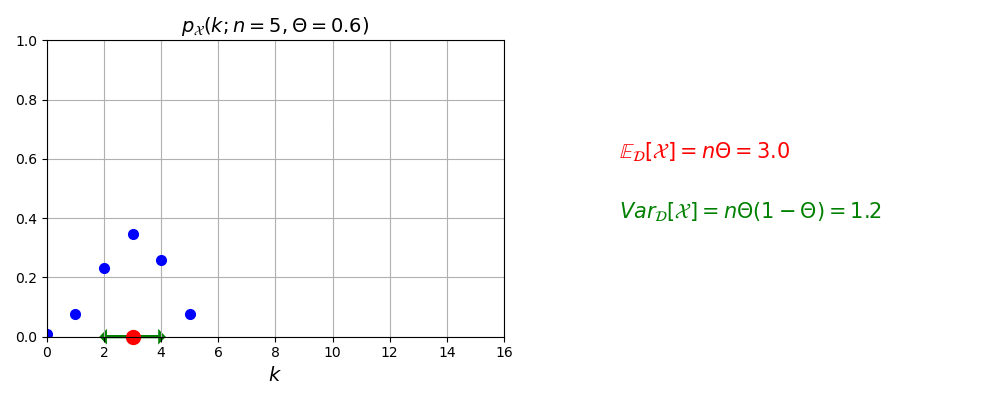

interactive(children=(IntSlider(value=5, description='n', max=15, min=1), FloatSlider(value=0.6, description='…

In [10]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Bin(n, theta):
    Exp = n * theta
    Var = n * theta * (1-theta)

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$k$', fontsize=14)
    ax1.set_xlim(0, 16)
    ax1.set_ylim(0, 1)

    ax2.clear()
    ax2.set_axis_off()

    x_range = range(0, n+1, 1)
    y = binom.pmf(x_range, n, theta)
    
    point1, = ax1.plot(x_range, y, linewidth=0, marker="o", markersize=7, markeredgecolor="b", markerfacecolor="b")
    point3, = ax1.plot([Exp], [0], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r", clip_on=False)
    ax1.arrow(Exp, 0, np.sqrt(Var), 0, head_width=0.03, head_length=0.15, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(Exp, 0, -np.sqrt(Var), 0, head_width=0.03, head_length=0.15, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    
    title1 = '$p_{\mathcal{X}}(k; n =$' + str(round(n,0)) +  '$, \Theta=$' + str(round(theta,1)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.6, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] = n \Theta =$' + str(round(Exp,1)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.4, '${Var}_{\mathcal{D}} [\mathcal{X}] = n \Theta (1 - \Theta) =$' + str(round(Var,1)), 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Bin, 
                    n = widgets.IntSlider(value=5, min=1, max=15, step=1),
                    theta = widgets.FloatSlider(value=0.6, min=0.0, max=1.0, step=0.1, description = '$\Theta$')
                   )
plt.show()

### _EX 3: Beta Distribution_

Let $\mathcal{X}$ be a continuous random variable, taking values $x \in [0,1]$, such that $\mathcal{D}$ follows a **Beta** distribution:

\begin{equation*}
    x \sim \mbox{Beta}(a,b) \qquad \mbox{where:} \qquad a,b >0	
\end{equation*}

This has a characteristic pdf $f_{\mathcal{X}}$:				

\begin{equation*}
    f_{\mathcal{X}}(x; a, b) = \frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)} x^{a-1} (1-x)^{b-1} \quad \mbox{where:} \quad \Gamma(a) = \int_{0}^{\infty} u^{a-1} e^{-u} du	
\end{equation*}

\begin{equation*}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = \frac{a}{a+b}	
\end{equation*}

\begin{equation*}
    \mbox{Var}_{\mathcal{D}}[\mathcal{X}] = \frac{ab}{(a+b)^2(a+b+1)}
\end{equation*}

<IPython.core.display.Javascript object>


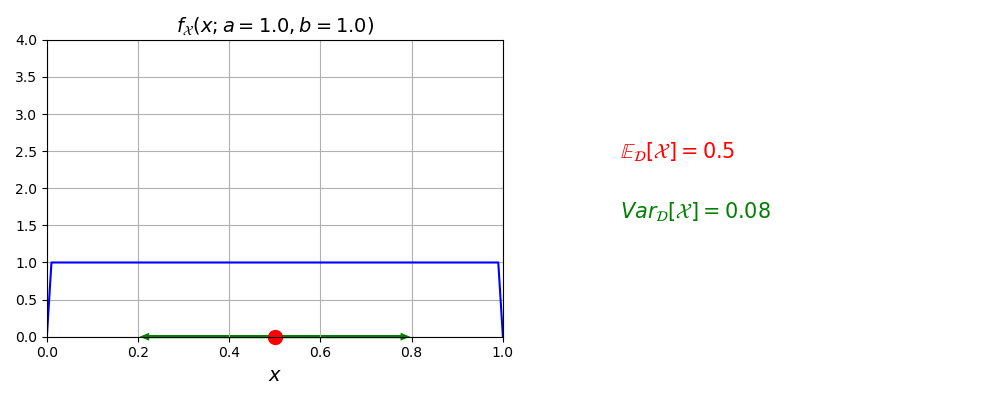

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

In [11]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Beta(a, b):
    Exp = a/(a+b)
    Var = a*b/((a+b)**2 * (a+b+1))

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 4)

    ax2.clear()
    ax2.set_axis_off()

    x_range = np.linspace(0, 1, 100)
    y = beta.pdf(x_range, a, b)
    line1, = ax1.plot(x_range, y, color="blue")
    point3, = ax1.plot([Exp], [0], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r", clip_on=False)
    ax1.arrow(Exp, 0, np.sqrt(Var), 0, head_width=0.05, head_length=0.01, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(Exp, 0, -np.sqrt(Var), 0, head_width=0.05, head_length=0.01, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)

    title1 = '$f_{\mathcal{X}}(x; a =$' + str(round(a,1)) +  '$, b=$' + str(round(b,1)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.6, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.4, '${Var}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Var,2)), 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Beta, 
                    a = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1),
                    b = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1)
                   )
plt.show()

### _EX 4: Gaussian Distribution_

Here $\mathcal{X}$ is a continuous random variable, taking values $x \in \mathbb{R}$, such that $\mathcal{D}$ follows a **Gaussian** or **Normal** distribution:

\begin{equation}
    x \sim \mathcal{N}(\mu,\sigma^2) \qquad \text{where:} \qquad \mu \in \mathbb{R}, \sigma \in (0, \infty)	
\end{equation}
	
This has a characteristic pdf $f_{\mathcal{X}}$:				

\begin{equation}
    f_{\mathcal{X}}(x ; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right)
\end{equation}

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\mathcal{X}] = \mu	
\end{equation}

\begin{equation}
    \text{Var}_{\mathcal{D}}[\mathcal{X}] = \sigma^2
\end{equation}

<IPython.core.display.Javascript object>


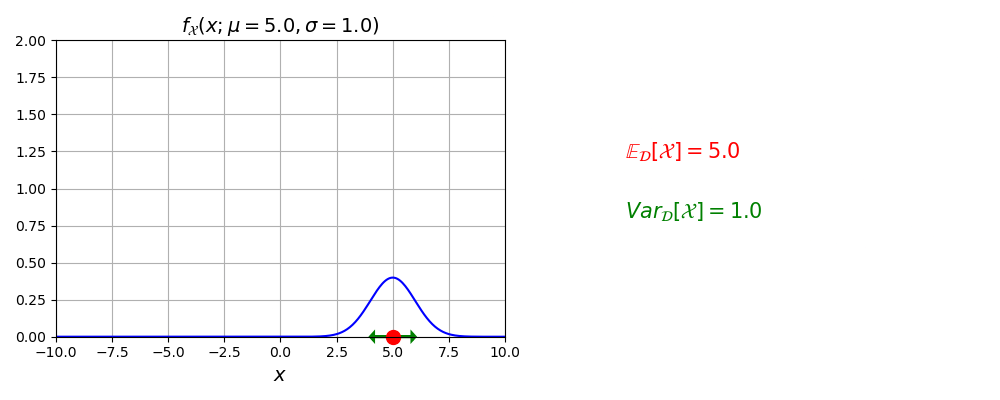

interactive(children=(FloatSlider(value=5.0, description='$\\mu$', max=10.0, min=-10.0, step=1.0), FloatSlider…

In [12]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Norm(mu, sigma):
    Exp = mu
    Var = sigma**2

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(0, 2)

    ax2.clear()
    ax2.set_axis_off()

    x_range = np.linspace(-30, 30, 1000)
    y = norm.pdf(x_range, mu, sigma)
    line1, = ax1.plot(x_range, y, color="blue")
    point3, = ax1.plot([Exp], [0], marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r", clip_on=False)
    ax1.arrow(Exp, 0, np.sqrt(Var), 0, head_width=0.05, head_length=0.15, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)
    ax1.arrow(Exp, 0, -np.sqrt(Var), 0, head_width=0.05, head_length=0.15, linewidth=2, color='g', 
              length_includes_head=True, clip_on=False)

    title1 = '$f_{\mathcal{X}}(x; \mu =$' + str(round(mu,1)) +  '$, \sigma=$' + str(round(sigma,1)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.6, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.4, '${Var}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Var,2)), 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Norm, 
                    mu = widgets.FloatSlider(value=5.0, min=-10, max=10, step=1, description = '$\mu$'),
                    sigma = widgets.FloatSlider(value=1.0, min=0.1, max=2, step=0.01, description = '$\sigma$')
                   )
plt.show()

### <ins>Multivariate Setting</ins>

### Expected Value

The expected value of some **multivariate** random vector, $\boldsymbol{\mathcal{X}} = [\mathcal{X}_1, \mathcal{X}_2, ..., \mathcal{X}_m]^T$, with outcomes, $\mathbf{x} \sim \mathcal{D}$, where $\mathbf{x} = [x_1, x_2, ..., x_m]^T$ and $\{ x_i \sim \mathcal{D}_i \}_{i=1}^m$ is:

\begin{equation}
		\mathbb{E}_{\mathcal{D}}[\boldsymbol{\mathcal{X}}] =
  		\begin{bmatrix}
		\mathbb{E}_{\mathcal{D}_1}[\mathcal{X}_{1}] \\
		\mathbb{E}_{\mathcal{D}_2}[\mathcal{X}_{2}] \\
		\vdots \\
		\mathbb{E}_{\mathcal{D}_m}[\mathcal{X}_{m}] \\
   		\end{bmatrix}
\end{equation}	


### Covariance
The **covariance** is a measure of the linear relationship between two random variables, $\mathcal{X}_1$ (with outcomes $x_1 \sim \mathcal{D}_1$) and $\mathcal{X}_2$ (with outcomes $x_2 \sim \mathcal{D}_2$), drawn from a joint distribution, $\mathcal{D}$ and is defined as:
\begin{equation}
    \mbox{Cov}[\mathcal{X}_1, \mathcal{X}_2] = \mathbb{E}_{\mathcal{D}}\left[ (\mathcal{X}_1 - \mathbb{E}_{\mathcal{D}_1}[\mathcal{X}_1]) (\mathcal{X}_2 - \mathbb{E}_{\mathcal{D}_2}[\mathcal{X}_2]) \right]
\end{equation}

We can prove that:
\begin{equation}
    \mbox{Cov}[\mathcal{X}_1, \mathcal{X}_2] = \mathbb{E}_{\mathcal{D}}\left[\mathcal{X}_1 \mathcal{X}_2 \right] - \mathbb{E}_{\mathcal{D}_1}\left[\mathcal{X}_1 \right] \mathbb{E}_{\mathcal{D}_2}\left[\mathcal{X}_2 \right]
\end{equation}

The covariance of some random vector, $\boldsymbol{\mathcal{X}} = [\mathcal{X}_1, \mathcal{X}_2, ..., \mathcal{X}_m]^T$, with outcomes, $\mathbf{x} \sim \mathcal{D}$, where $\mathbf{x} = [x_1, x_2, ..., x_m]^T$ and $\{ x_i \sim \mathcal{D}_i \}_{i=1}^m$ is characterised by the **covariance matrix**:
\begin{align}
    \boldsymbol{\Sigma} &= \mathbb{E}_{\mathcal{D}} \left[ (\boldsymbol{\mathcal{X}} - \mathbb{E}_{\mathcal{D}}[\boldsymbol{\mathcal{X}}])(\boldsymbol{\mathcal{X}} - \mathbb{E}_{\mathcal{D}}[\boldsymbol{\mathcal{X}}])^T \right] \\
    &\\
    &=\begin{bmatrix}
    \mbox{Var}[\mathcal{X}_{1}] & \mbox{Cov}[\mathcal{X}_{1},\mathcal{X}_{2}] & ... & \mbox{Cov}[\mathcal{X}_{1},\mathcal{X}_{m}]\\
    \mbox{Cov}[\mathcal{X}_{2},\mathcal{X}_{1}] & \mbox{Var}[\mathcal{X}_{2}] & ... & \mbox{Cov}[\mathcal{X}_{2},\mathcal{X}_{m}]\\
    \vdots & \vdots & \ddots & \vdots \\
    \mbox{Cov}[\mathcal{X}_{m},\mathcal{X}_{1}] & \mbox{Cov}[\mathcal{X}_{m},\mathcal{X}_{2}] & ... & \mbox{Var}[\mathcal{X}_{m}]\\
    \end{bmatrix}
\end{align}	

Note that $\boldsymbol{\Sigma}$ is symmetric and **positive semidefinite**.

### Correlation
The **correlation** is the normalised covariance and always lies between -1 and 1:
\begin{equation}
    \rho(\mathcal{X}_1, \mathcal{X}_2) = \frac{\mbox{Cov}[\mathcal{X}_1, \mathcal{X}_2]}{\sqrt{\mbox{Var}_{\mathcal{D}_1}[\mathcal{X}_1] \mbox{Var}_{\mathcal{D}_2}[\mathcal{X}_2]}}
\end{equation}

Two variables are said to be **uncorrelated** if:
\begin{equation}
    \mbox{Cov}[\mathcal{X}_1, \mathcal{X}_2] = \rho(\mathcal{X}_1,\mathcal{X}_2) =0
\end{equation}
	
We can store a set of correlations between $m$ different random variables in a **correlation matrix**, a normalised version of the covariance matrix:
\begin{equation*}
    \boldsymbol{\rho} =\begin{bmatrix}
    1 & \frac{\mbox{Cov}[\mathcal{X}_1, \mathcal{X}_2]}{\sqrt{\mbox{Var}_{\mathcal{D}_1}[\mathcal{X}_1] \mbox{Var}_{\mathcal{D}_2}[\mathcal{X}_2]}} & ... & \frac{\mbox{Cov}[\mathcal{X}_1, \mathcal{X}_m]}{\sqrt{\mbox{Var}_{\mathcal{D}_1}[\mathcal{X}_1] \mbox{Var}_{\mathcal{D}_m}[\mathcal{X}_m]}}\\
    \frac{\mbox{Cov}[\mathcal{X}_2, \mathcal{X}_1]}{\sqrt{\mbox{Var}_{\mathcal{D}_2}[\mathcal{X}_2] \mbox{Var}_{\mathcal{D}_1}[\mathcal{X}_1]}} & 1 & ... & \frac{\mbox{Cov}[\mathcal{X}_2, \mathcal{X}_m]}{\sqrt{\mbox{Var}_{\mathcal{D}_2}[\mathcal{X}_2] \mbox{Var}_{\mathcal{D}_m}[\mathcal{X}_m]}}\\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\mbox{Cov}[\mathcal{X}_m, \mathcal{X}_1]}{\sqrt{\mbox{Var}_{\mathcal{D}_m}[\mathcal{X}_m] \mbox{Var}_{\mathcal{D}_1}[\mathcal{X}_1]}} & \frac{\mbox{Cov}[\mathcal{X}_m, \mathcal{X}_2]}{\sqrt{\mbox{Var}_{\mathcal{D}_m}[\mathcal{X}_m] \mbox{Var}_{\mathcal{D}_2}[\mathcal{X}_2]}} & ... & 1\\
    \end{bmatrix}
\end{equation*}

Now, let's illustrate some of these statistics via a considersation of the **Multivariate Gaussian Distribution** (MVG):

### _EX: Multivariate Gaussian Distribution_

A random vector $\boldsymbol{\mathcal{X}} = [\mathcal{X}_1,...,\mathcal{X}_n]^T$, with outcomes $\mathbf{x}$, is distributed like a \textbf{multivariate Gaussian} distribution if it has the following characterisation:\\

\begin{equation}
    \mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma}) \qquad \text{where:} \qquad \boldsymbol{\mu} \in \mathbb{R}^n, \; \boldsymbol{\Sigma}^T=\boldsymbol{\Sigma}, \; \boldsymbol{\Sigma} \succ 0	
\end{equation}

This has a characteristic pdf $f_{\boldsymbol{\mathcal{X}}}$:				

\begin{equation}
	f_{\boldsymbol{\mathcal{X}}}(\mathbf{x} ; \boldsymbol{\mu},\boldsymbol{\Sigma}) = \frac{1}{(2 \pi)^{n/2}} \frac{1}{\vert \boldsymbol{\Sigma} \vert^{1/2}} \exp \left( -\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right)
\end{equation}

\begin{equation}
		\mathbb{E}_{\mathcal{D}}[\boldsymbol{\mathcal{X}}] = \boldsymbol{\mu}
\end{equation}

\begin{equation}
		\text{Cov}_{\mathcal{D}}[\boldsymbol{\mathcal{X}}] = \boldsymbol{\Sigma}
\end{equation}

Note that the **isocontours** of a multivariate Gaussian are characterised by the exponent of the pdf:
\begin{equation}
	(\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})
\end{equation}

And this is nothing more than the equation for the isocontours of the quadratic form of a positive definite matrix.

Recall that this means that isocontours are **ellipsoids** with:

- **centre** at $\boldsymbol{\mu}$

- **axes** pointing in the direction of the eignevectors of $\boldsymbol{\Sigma}^{-1}$

- **radii** proportional to the square root of the corresponding eigenvalues of $\boldsymbol{\Sigma}$ 


<IPython.core.display.Javascript object>


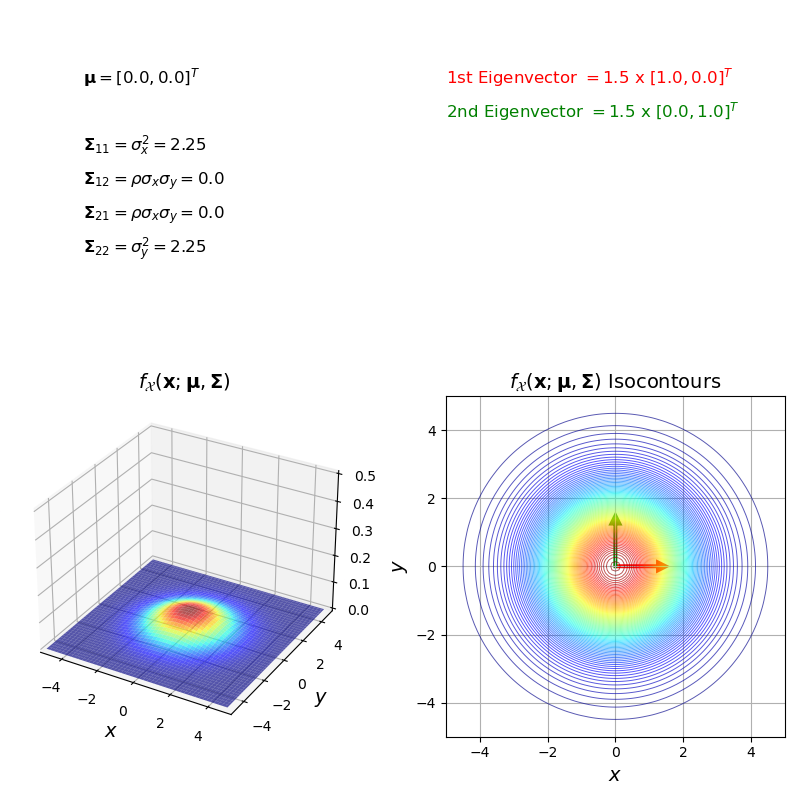

interactive(children=(FloatSlider(value=0.0, description='$\\mu_x$', max=5.0, min=-5.0, step=1.0), FloatSlider…

In [13]:
plt.close('all')
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3, projection="3d")
ax4 = fig.add_subplot(2,2,4)

ax1.clear()
ax1.set_axis_off()
ax2.clear()
ax2.set_axis_off()
ax3.grid()
ax4.grid()

def plot_MVG(mux, muy, sigx, sigy, rho):
    Sigma = np.array([[sigx**2, rho*sigx*sigy], [rho*sigx*sigy, sigy**2]])
    Sigma_inv = np.linalg.inv(Sigma)
    eigenvalues, eigenvectors = np.linalg.eig(Sigma_inv)
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]    
    eigenvalues = 1/np.sqrt(eigenvalues)

    ax1.clear()
    ax1.set_axis_off()
    ax1.text(0.2, 0.8, '$\mathbf{\mu} = [$' + str(round(mux,2)) + '$,$' + str(round(muy,2)) +'$]^T$', fontsize = 12)
    ax1.text(0.2, 0.6, '$\mathbf{\Sigma}_{11} = \sigma_{x}^2 = $' + str(round(sigx**2,2)), fontsize = 12)
    ax1.text(0.2, 0.5, r'$\mathbf{\Sigma}_{12} = \rho \sigma_{x} \sigma_{y} = $' 
                         + str(round(rho * sigx * sigy,2)), fontsize = 12)
    ax1.text(0.2, 0.4, r'$\mathbf{\Sigma}_{21} = \rho \sigma_{x} \sigma_{y} = $' 
                         + str(round(rho * sigx * sigy,2)), fontsize = 12)
    ax1.text(0.2, 0.3, '$\mathbf{\Sigma}_{22} = \sigma_{y}^2 = $' + str(round(sigy**2,2)), fontsize = 12)

    ax2.clear()
    ax2.set_axis_off()
    ax2.text(0.0, 0.8, '1st Eigenvector $=$' + str(round(eigenvalues[1],2)) + ' x $[$' + 
                         str(round(eigenvectors[0][1],2)) + '$,$' + 
                         str(round(eigenvectors[1][1],2)) +'$]^T$', fontsize = 12, color = 'r')
    ax2.text(0.0, 0.7, '2nd Eigenvector $=$' + str(round(eigenvalues[0],2)) + ' x $[$' + 
                         str(round(eigenvectors[0][0],2)) + '$,$' + 
                         str(round(eigenvectors[1][0],2)) +'$]^T$', fontsize = 12, color = 'g')

    ax3.clear()
    ax3.set_xlabel('$x$', fontsize=14)
    ax3.set_ylabel('$y$', fontsize=14)
    ax3.set_xlim(-5, 5)
    ax3.set_ylim(-5, 5)
    ax3.set_zlim(0, 0.5)
    ax3.grid()
    x_range, y_range = np.mgrid[-5:5:.1, -5:5:.1]
    pos = np.dstack((x_range, y_range))
    rv = multivariate_normal([mux, muy], [[sigx**2, rho*sigx*sigy], [rho*sigx*sigy, sigy**2]])
    ax3.plot_surface(x_range, y_range, rv.pdf(pos), cmap=plt.cm.jet, alpha=0.65)
    title3 = r"$f_{\mathcal{X}}(\mathbf{x}; \mathbf{\mu}, \mathbf{\Sigma})$"
    ax3.set_title(title3, fontsize=14)

    ax4.clear()
    ax4.set_xlabel('$x$', fontsize=14)
    ax4.set_ylabel('$y$', fontsize=14)
    ax4.set_xlim(-5, 5)
    ax4.set_ylim(-5, 5)
    ax4.grid()
    ax4.contour(x_range, y_range, rv.pdf(pos), 100, cmap=plt.cm.jet, linewidths=0.7, alpha=0.65)
    title4 = r"$f_{\mathcal{X}}(\mathbf{x}; \mathbf{\mu}, \mathbf{\Sigma})$ Isocontours"
    ax4.arrow(mux, muy, eigenvalues[1]*eigenvectors[0][1], 1*eigenvalues[1]*eigenvectors[1][1], head_width=0.25, head_length=0.25, linewidth=2.5, color='r', 
              length_includes_head=True, clip_on=False)
    ax4.arrow(mux, muy, eigenvalues[0]*eigenvectors[0][0], 1*eigenvalues[0]*eigenvectors[1][0], head_width=0.25, head_length=0.25, linewidth=2.5, color='g', 
              length_includes_head=True, clip_on=False)
    ax4.set_title(title4, fontsize=14)

    plt.show()
    
int_plot = interact(plot_MVG, 
                    mux  = widgets.FloatSlider(value=0.0, min=-5, max=5, step=1, description = '$\mu_x$'),
                    muy  = widgets.FloatSlider(value=0.0, min=-5, max=5, step=1, description = '$\mu_y$'),
                    sigx = widgets.FloatSlider(value=1.5, min=0.1, max=3, step=0.01, description = '$\sigma_x$'),
                    sigy = widgets.FloatSlider(value=1.5, min=0.1, max=3, step=0.01, description = '$\sigma_y$'),
                    rho  = widgets.FloatSlider(value=0.0, min=-0.95, max=0.95, step=0.05, description = r'$\rho$')
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. <b>Isotropic Gaussian:</b> Try setting the sliders such that $\sigma_x = \sigma_y$ and $\rho=0$. What do you observe?

2. <b>Anisotropic Gaussian:</b> Try setting the sliders such that $\sigma_x \neq \sigma_y$ and $\rho=0$. What do you observe?

3. <b>General Gaussian:</b> Try setting the sliders such that $\sigma_x \neq \sigma_y$ and $\rho \neq 0$. What do you observe?
</div>

<div class=answer>
<b>Answer:</b>
    
1. The isocontours are concentric circles.

2. The isocontours are axis aligned ellipses.

3. In general the isocontours are non-axis-aligned ellipses.
</div>

### Correlation & Independence

It is important to note that:
<p style="text-align: center;">
If two variables are independent, this <strong>implies</strong> they are uncorrelated.
</p>
<p style="text-align: center;">
If two variables are uncorrelated, this <strong>does not imply</strong> they are independent in general.    
</p>


We will illustrate this with three examples:


### _EX1: Gaussian-Uniform Distribution:_ 
#### _Independence $\implies$ Correlation = 0_

We define this bivariate distribution, with underlying random variables $\mathcal{X}$ and $\mathcal{Y}$, with the following pdf $f_{\mathcal{X},\mathcal{Y}}$:				

\begin{equation}
	f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b) = \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a} 
\end{equation}

From this we can derive the marginal distributions:
\begin{equation}
	f_{\mathcal{X}}(x ; \mu, \sigma) = \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right)
\end{equation}

\begin{equation}
	f_{\mathcal{Y}}(y ; a, b) = \mathbb{I}[a \leq y \leq b]\frac{1}{b-a}
\end{equation}
Note that these characterise a Univariate Gaussian pdf and a Uniform pdf respectively.
And the conditional distributions:
\begin{equation}
	f_{\mathcal{X}}(x \vert y ; \mu, \sigma) = \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) 
\end{equation}

\begin{equation}
	f_{\mathcal{Y}}(y \vert x ; a, b) = \mathbb{I}[a \leq y \leq b]\frac{1}{b-a} 
\end{equation}


<IPython.core.display.Javascript object>


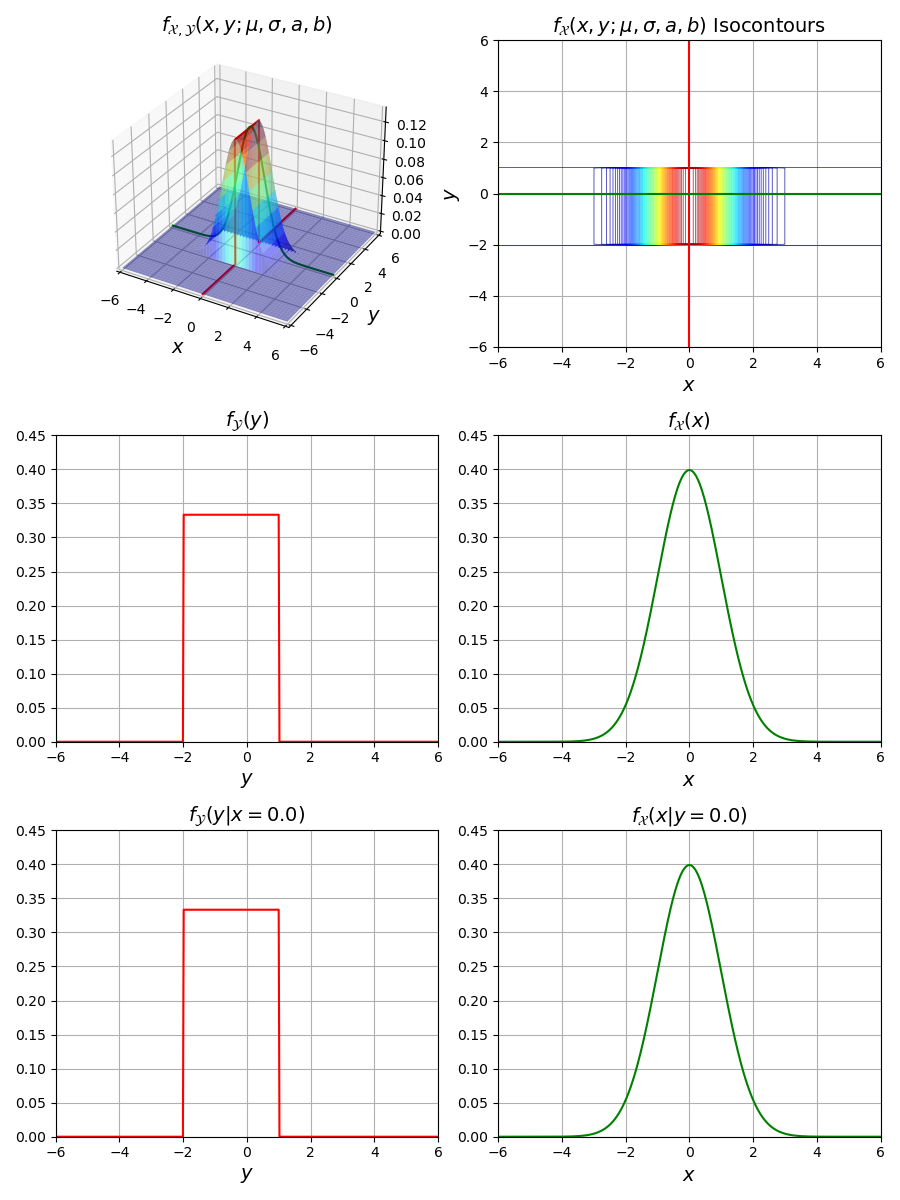

interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=0.0, descr…

In [14]:
def Gaussian_Uniform(mu, sig, a, b, xrange, yrange):
    arg1 = ((xrange-mu)/sig)**2
    pdf1 = (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-0.5*arg1)
    arg2 = 1/(b-a)
    ind = np.zeros(yrange.shape)
    mask1 = (yrange>=a)
    mask2 = (yrange<=b)
    mask = mask1*mask2
    ind[mask] = 1
    pdf2 = ind*arg2
    z = pdf1 * pdf2
    return z

def Gaussian_Uniform_xcondy(mu, sig, a, b, xrange):
    arg1 = ((xrange-mu)/sig)**2
    pdf1 = (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-0.5*arg1)
    z = pdf1
    return z

def Gaussian_Uniform_ycondx(mu, sig, a, b, yrange):
    arg2 = 1/(b-a)
    ind = np.zeros(yrange.shape)
    mask1 = (yrange>=a)
    mask2 = (yrange<=b)
    mask = mask1*mask2
    ind[mask] = 1
    pdf2 = ind*arg2
    z = pdf2
    return z

def Gaussian_Uniform_x(mu, sig, xrange):
    arg1 = ((xrange-mu)/sig)**2
    pdf1 = (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-0.5*arg1)
    z = pdf1
    return z

def Gaussian_Uniform_y(a, b, yrange):
    arg2 = 1/(b-a)
    ind = np.zeros(yrange.shape)
    mask1 = (yrange>=a)
    mask2 = (yrange<=b)
    mask = mask1*mask2
    ind[mask] = 1
    pdf2 = ind*arg2
    z = pdf2
    return z

[mu, sig, a, b] = [0, 1, -2, 1]

fig = plt.figure(figsize=(9,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.4,
                    wspace=0.5)

ax1 = fig.add_subplot(3,2,1, projection="3d")
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$y$', fontsize=14)
ax3.set_xlabel('$y$', fontsize=14)
ax4.set_xlabel('$x$', fontsize=14)
ax5.set_xlabel('$y$', fontsize=14)
ax6.set_xlabel('$x$', fontsize=14)

ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax3.set_xlim(-6, 6)
ax3.set_ylim(0, 0.45)
ax4.set_xlim(-6, 6)
ax4.set_ylim(0, 0.45)
ax5.set_xlim(-6, 6)
ax5.set_ylim(0, 0.45)
ax6.set_xlim(-6, 6)
ax6.set_ylim(0, 0.45)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

x_line = np.linspace(-6, 6, 500)
y_line = np.linspace(-6, 6, 500)
x, y = np.meshgrid(x_line, y_line)

z = Gaussian_Uniform(mu, sig, a, b, x, y)

ax1.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=0.45)
ax2.contour(x, y, z, 100, cmap=plt.cm.jet, linewidths=0.7, alpha=0.65)
title2 = r"$f_{\mathcal{X}}(x, y; \mu, \sigma, a, b)$ Isocontours"
ax2.set_title(title2, fontsize=14)
line1, = ax1.plot([], [], [], color="red")
line2, = ax1.plot([], [], [], color="green")
line3, = ax2.plot([], [], color="red")
line4, = ax2.plot([], [], color="green")
line5, = ax5.plot([], [], color="red")
line6, = ax6.plot([], [], color="green")
                      
y_prob = Gaussian_Uniform_y(a, b, y_line)
ax3.plot(y_line, y_prob, color="red")

x_prob = Gaussian_Uniform_x(mu, sig, x_line)
ax4.plot(x_line, x_prob, color="green")

title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
ax1.set_title(title1, fontsize=14)
title3 = r"$f_{\mathcal{Y}}(y)$"
ax3.set_title(title3, fontsize=14)
title4 = r"$f_{\mathcal{X}}(x)$"
ax4.set_title(title4, fontsize=14)

def plot_delta_lines(x, y):
    x1_range = np.linspace(x, x, 500)
    y1_range = np.linspace(-6, 6, 500)
    z1 = Gaussian_Uniform(mu, sig, a, b, x1_range, y1_range)
    
    x2_range = np.linspace(-6, 6, 500)
    y2_range = np.linspace(y, y, 500)
    z2 = Gaussian_Uniform(mu, sig, a, b, x2_range, y2_range)

    line1.set_data(x1_range, y1_range)
    line1.set_3d_properties(z1)
    line2.set_data(x2_range, y2_range)
    line2.set_3d_properties(z2)

    line3.set_data([x1_range], [y1_range])
    line4.set_data([x2_range], [y2_range])

    y_vert_x = Gaussian_Uniform_ycondx(mu, sig, a, b, y1_range)
    line5.set_data(y1_range, y_vert_x)

    x_vert_y = Gaussian_Uniform_xcondy(mu, sig, a, b, x2_range)
    line6.set_data(x2_range, x_vert_y)

    title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y; \mu, \sigma, a, b)$"
    ax1.set_title(title1, fontsize=14)
    title5 = r"$f_{\mathcal{Y}}(y | x=$" + str(round(x,1)) +"$)$"
    ax5.set_title(title5, fontsize=14)
    title6 = r"$f_{\mathcal{X}}(x | y=$" + str(round(y,1)) +"$)$"
    ax6.set_title(title6, fontsize=14)

    plt.show()

    
int_plot = interact(plot_delta_lines, 
                    x = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1),
                    y = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try varying the $x$ and $y$ sliders. What do you notice about how the conditional distributions vary?

2. Prove that $\mathcal{X}$ and $\mathcal{Y}$ are independent.

3. Prove that the covariance of $\mathcal{X}$ and $\mathcal{Y}$ is equal to $0$.   

4. Try to derive the form of the marginal and conditional distributions given above. 
</div>

<div class=answer>
<b>Answer:</b>
    
1. The conditional distributions do not vary, they are independent of the setting of $x$ and $y$ respectively.

2. We observe that:
    
    \begin{align}
	f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b) &= \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a} \\
    &= f_{\mathcal{X}}(x ; \mu, \sigma) f_{\mathcal{Y}}(y ; a, b)
\end{align}
    
    This is the definitive property of independence.

3. We observe that:
    
    \begin{align}
    \mbox{Cov}[\mathcal{X}, \mathcal{Y}] &= \mathbb{E}_{\mathcal{X,Y}}\left[\mathcal{X} \mathcal{Y} \right] - \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] \mathbb{E}_{\mathcal{Y}}\left[\mathcal{Y} \right] \\
    &= \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] \mathbb{E}_{\mathcal{Y}}\left[\mathcal{Y} \right] - \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] \mathbb{E}_{\mathcal{Y}}\left[\mathcal{Y} \right] \\
    &= 0
\end{align}
    
    Where we note that: $\mathbb{E}_{\mathcal{X,Y}}\left[\mathcal{X} \mathcal{Y} \right] = \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] \mathbb{E}_{\mathcal{Y}}\left[\mathcal{Y} \right]$ due to the independence of $\mathcal{X}$ and $\mathcal{Y}$.   

   <b>Note that the zero valued covariance between  $\mathcal{X}$ and $\mathcal{Y}$ follows as a consequence of their independence<b> 
    

4. Try to derive the form of the marginal and conditional distributions given above. 
    
    \begin{align}
    f_{\mathcal{X}}(x ; \mu, \sigma) &= \int f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b) dy \\
	&= \int \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a} dy\\
	&= \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \int \frac{\mathbb{I}[a \leq y \leq b]}{b-a} dy\\
	&= \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right)
\end{align}

    \begin{align}
    f_{\mathcal{Y}}(y ; a, b) &= \int f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b) dy \\
	&= \int \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a} dx\\
	&= \int \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) dx \frac{\mathbb{I}[a \leq y \leq b]}{b-a}\\
	&= \frac{\mathbb{I}[a \leq y \leq b]}{b-a}
\end{align}
    
    \begin{align}
    f_{\mathcal{X}}(x \vert y ; \mu, \sigma) &= \frac{ f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b)}{f_{\mathcal{Y}}(y ; a, b)} \\
	&= \frac{\frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a}}{\frac{\mathbb{I}[a \leq y \leq b]}{b-a}}\\
	&= \frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) 
\end{align}
    
    \begin{align}
    f_{\mathcal{Y}}(y \vert x ; a, b) &= \frac{ f_{\mathcal{X},\mathcal{Y}}(x, y ; \mu, \sigma, a, b)}{f_{\mathcal{X}}(x ; \mu, \sigma)} \\
	&= \frac{\frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right) \frac{\mathbb{I}[a \leq y \leq b]}{b-a}}{\frac{1}{(2 \pi)^{1/2}} \frac{1}{\sigma} \exp \left( -\frac{1}{2}\frac{(x- \mu)^2}{\sigma^2}\right)}\\
	&= \frac{\mathbb{I}[a \leq y \leq b]}{b-a}
\end{align}
    
</div>

### _EX2: Gaussian-Chi Squared Distribution:_  
#### _Correlation = 0 $\not \Rightarrow$ Independence_

We define this bivariate distribution, with underlying random variables $\mathcal{X}$ and $\mathcal{Y}$, with the following pdf $f_{\mathcal{X}, \mathcal{Y}}$:				

\begin{equation}
	f_{\mathcal{X},\mathcal{Y}}(x, y) = \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right) 
\end{equation}

From this we can derive the marginal distributions:
\begin{equation}
	f_{\mathcal{X}}(x) = \frac{1}{(2 \pi)^{1/2}}\exp \left( -\frac{1}{2}x^2\right) 
\end{equation}

\begin{equation}
	f_{\mathcal{Y}}(y) = \frac{1}{(2 \pi y)^{1/2}}\exp \left( -\frac{1}{2}y\right)
\end{equation}
Note that these characterise a Univariate Gaussian pdf and a Chi-Squared pdf respectively.

And the conditional distributions:
\begin{equation}
	f_{\mathcal{X}}(x \vert y ) = y^{1/2}\exp \left( \frac{1}{2}\left (y- x^2 \right)\right) \delta \left(y - x^2 \right)
\end{equation}

\begin{equation}
	f_{\mathcal{Y}}(y \vert x) = \delta \left(y - x^2 \right) 
\end{equation}


<IPython.core.display.Javascript object>


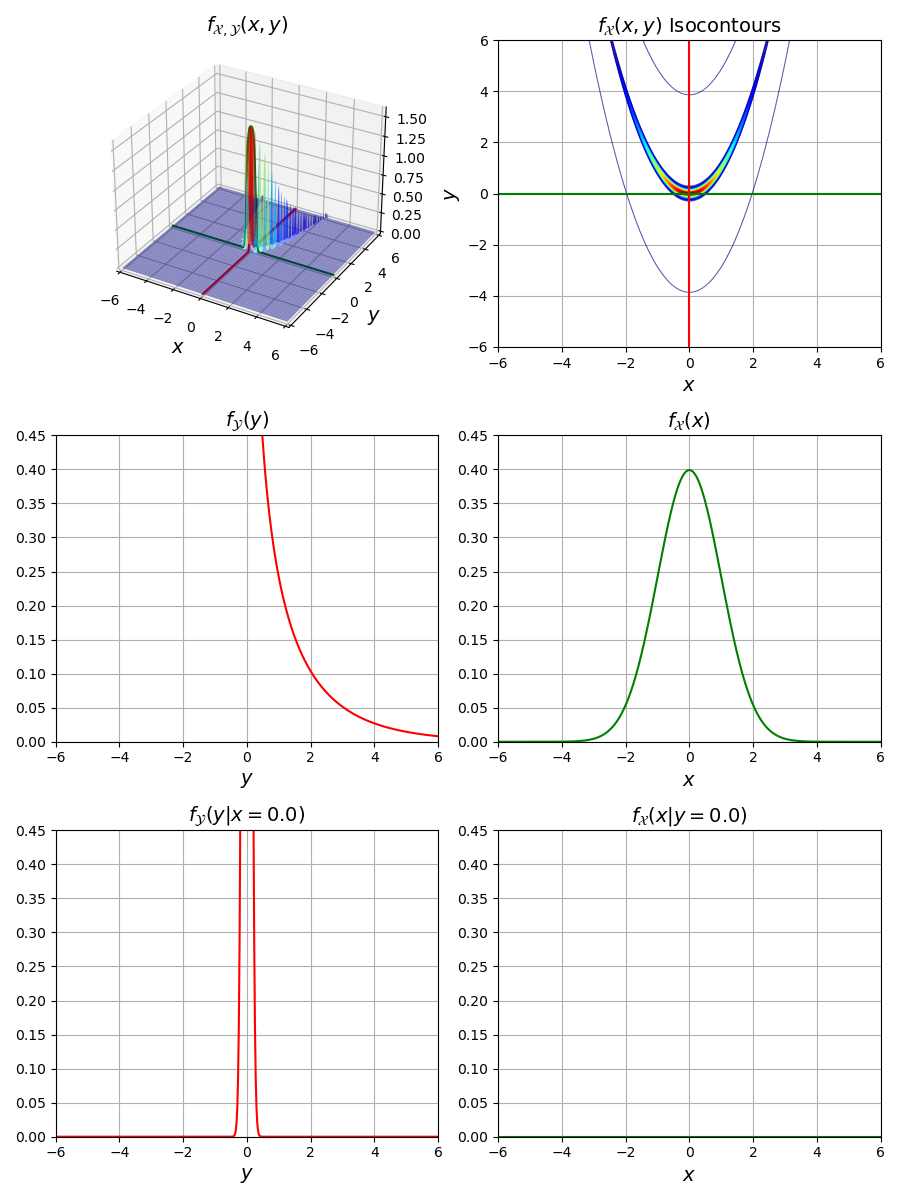

interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=0.0, descr…

In [15]:
eps_ = np.finfo(np.float64).eps  
# A proxy for the Dirac-Delta distribution, that models the distribution as a narrow univariate Gaussian
def diracdelta(x, alpha):
    eps = 1e-1 
    #eps = np.finfo(np.float64).eps    
    arg = ((x-alpha)/eps)**2
    pdf = (1/(eps*np.sqrt(2*np.pi))) * np.exp(-0.5*arg)
    return pdf

def Gaussian_Dirac(xrange, yrange):
    arg1 = xrange**2
    pdf1 = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*arg1)
    pdf2 = diracdelta(yrange, xrange**2)
    z = pdf1 * pdf2
    return z

def Gaussian_Dirac_xcondy(xrange, y):
    arg1 = y - xrange**2
    pdf1 = np.sqrt(np.maximum(y, eps_)) * np.exp(0.5*arg1)
    pdf2 = diracdelta(xrange, np.sqrt(np.maximum(y, eps_))) + diracdelta(xrange, -np.sqrt(np.maximum(y, eps_)))
    z = 0.5 * pdf1 * pdf2
    return z

def Gaussian_Dirac_ycondx(y_range, x):
    pdf = diracdelta(y_range, x**2)
    z = pdf
    return z

def Gaussian_Dirac_x(xrange):
    arg1 = xrange**2
    pdf1 = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*arg1)
    z = pdf1
    return z

def Gaussian_Dirac_y(yrange):
    arg1 = yrange
    pdf1 = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*arg1)
    z = pdf1/np.sqrt(np.maximum(yrange, eps_))
    return z

fig = plt.figure(figsize=(9,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.4,
                    wspace=0.5)

ax1 = fig.add_subplot(3,2,1, projection="3d")
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$y$', fontsize=14)
ax3.set_xlabel('$y$', fontsize=14)
ax4.set_xlabel('$x$', fontsize=14)
ax5.set_xlabel('$y$', fontsize=14)
ax6.set_xlabel('$x$', fontsize=14)

ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax3.set_xlim(-6, 6)
ax3.set_ylim(0, 0.45)
ax4.set_xlim(-6, 6)
ax4.set_ylim(0, 0.45)
ax5.set_xlim(-6, 6)
ax5.set_ylim(0, 0.45)
ax6.set_xlim(-6, 6)
ax6.set_ylim(0, 0.45)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

x_line = np.linspace(-6, 6, 1000)
y_line = np.linspace(-6, 6, 1000)
x, y = np.meshgrid(x_line, y_line)

z = Gaussian_Dirac(x, y)

ax1.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=0.45)
ax2.contour(x, y, z, 100, cmap=plt.cm.jet, linewidths=0.7, alpha=0.65)
title2 = r"$f_{\mathcal{X}}(x, y)$ Isocontours"
ax2.set_title(title2, fontsize=14)
line1, = ax1.plot([], [], [], color="red")
line2, = ax1.plot([], [], [], color="green")
line3, = ax2.plot([], [], color="red")
line4, = ax2.plot([], [], color="green")
line5, = ax5.plot([], [], color="red")
line6, = ax6.plot([], [], color="green")
                      
y_prob = Gaussian_Dirac_y(y_line)
ax3.plot(y_line, y_prob, color="red")

x_prob = Gaussian_Dirac_x(x_line)
ax4.plot(x_line, x_prob, color="green")

title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
ax1.set_title(title1, fontsize=14)
title3 = r"$f_{\mathcal{Y}}(y)$"
ax3.set_title(title3, fontsize=14)
title4 = r"$f_{\mathcal{X}}(x)$"
ax4.set_title(title4, fontsize=14)

def plot_delta_lines(x, y):
    x1_range = np.linspace(x, x, 500)
    y1_range = np.linspace(-6, 6, 500)
    z1 = Gaussian_Dirac(x1_range, y1_range)
    
    x2_range = np.linspace(-6, 6, 500)
    y2_range = np.linspace(y, y, 500)
    z2 = Gaussian_Dirac(x2_range, y2_range)

    line1.set_data(x1_range, y1_range)
    line1.set_3d_properties(z1)
    line2.set_data(x2_range, y2_range)
    line2.set_3d_properties(z2)

    line3.set_data([x1_range], [y1_range])
    line4.set_data([x2_range], [y2_range])

    y_vert_x = Gaussian_Dirac_ycondx(y1_range, x)
    line5.set_data(y1_range, y_vert_x)

    x_vert_y = Gaussian_Dirac_xcondy(x2_range, y)
    line6.set_data(x2_range, x_vert_y)

    title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
    ax1.set_title(title1, fontsize=14)
    title5 = r"$f_{\mathcal{Y}}(y | x=$" + str(round(x,1)) +"$)$"
    ax5.set_title(title5, fontsize=14)
    title6 = r"$f_{\mathcal{X}}(x | y=$" + str(round(y,1)) +"$)$"
    ax6.set_title(title6, fontsize=14)

    plt.show()

    
int_plot = interact(plot_delta_lines, 
                    x = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1),
                    y = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try varying the $x$ and $y$ sliders. What do you notice about how the conditional distributions vary?

2. Prove that the covariance of $\mathcal{X}$ and $\mathcal{Y}$ is  equal to $0$.

3. Prove that $\mathcal{X}$ and $\mathcal{Y}$ are dependent.   
    
4. Try to derive the form of the marginal and conditional distributions given above. You may find it useful to note that: $\delta(x^2 - a^2) = (2a)^{-1} \left[ \delta(x-a) + \delta(x+a) \right]$.  
</div>

<div class=answer>
<b>Answer:</b>
    
1. Both conditional distributions do vary, they are dependent on the setting of $x$ and $y$ respectively.

2. We observe that:
    
    \begin{align}
    \mathbb{E}_{\mathcal{X,Y}}\left[\mathcal{X} \mathcal{Y} \right] &= \iint xy \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right)  dx dy\\
&= \int x^3 \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right)  dx\\
&= 0 \qquad \mbox{by the symmetry of the Gaussian}
    \end{align}

    And:
    \begin{align}
    \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] &= \int x \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) dx\\
&= 0 \qquad \mbox{by the symmetry of the Gaussian}
    \end{align}

    Thus:
    \begin{align}
    \mbox{Cov}[\mathcal{X}, \mathcal{Y}] &= \mathbb{E}_{\mathcal{X,Y}}\left[\mathcal{X} \mathcal{Y} \right] - \mathbb{E}_{\mathcal{X}}\left[\mathcal{X} \right] \mathbb{E}_{\mathcal{Y}}\left[\mathcal{Y} \right]\\
    &=0
\end{align}    
    
3. We observe that:
    
    \begin{align}
	f_{\mathcal{X},\mathcal{Y}}(x, y) &= \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right)  \\
    &\neq f_{\mathcal{X}}(x ; \mu, \sigma) f_{\mathcal{Y}}(y ; a, b)
\end{align}
    
    Thus the definitive property of independence is not satisfied.

    <b>Note that the zero valued covariance between  $\mathcal{X}$ and $\mathcal{Y}$ does not imply their independence<b> 

    
4. Try to derive the form of the marginal and conditional distributions given above. 
    
    \begin{align}
    f_{\mathcal{X}}(x) &= \int f_{\mathcal{X},\mathcal{Y}}(x, y) dy \\
	&= \int \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right) dy\\
	&= \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right)
\end{align}

     \begin{align}
    f_{\mathcal{Y}}(y) &= \int f_{\mathcal{X},\mathcal{Y}}(x, y) dy \\
	&= \int \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right) dx\\
	&= \int \frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \left( (2y^{1/2})^{-1} \left[ \delta(x-y^{1/2}) + \delta(x+y^{1/2}) \right] \right) dx \\
    &= \frac{1}{(2 \pi y)^{1/2}} \exp \left( -\frac{1}{2}{y}\right)
\end{align}
    
    \begin{align}
    f_{\mathcal{X}}(x \vert y) &= \frac{ f_{\mathcal{X},\mathcal{Y}}(x, y)}{f_{\mathcal{Y}}(y)} \\
	&= \frac{\frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right)}{\frac{1}{(2 \pi y)^{1/2}} \exp \left( -\frac{1}{2}{y}\right)}\\
	&= y^{1/2}\exp \left( \frac{1}{2}\left (y- x^2 \right)\right) \delta \left(y - x^2 \right)
    \end{align}
        
    \begin{align}
    f_{\mathcal{Y}}(y \vert x) &= \frac{ f_{\mathcal{X},\mathcal{Y}}(x, y)}{f_{\mathcal{X}}(x)} \\
	&= \frac{\frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right) \delta \left(y - x^2 \right)}{\frac{1}{(2 \pi)^{1/2}} \exp \left( -\frac{1}{2}{x^2}\right)}\\
	&= \delta \left(y - x^2 \right)  
\end{align}
    
</div>

### _EX3: Bivariate Gaussian Distribution:_  
#### _Correlation = 0 $\iff$ Independence_

We define this bivariate distribution, with underlying random variables $\mathcal{X}$ and $\mathcal{Y}$, with the following pdf $f_{\mathcal{X},\mathcal{Y}}$:				

\begin{equation}
        f_{\mathcal{X},\mathcal{Y}}(x, y ; \sigma_x, \sigma_y, \rho) = \frac{1}{2 \pi \sigma_x \sigma_y\sqrt{(1-\rho^2)}} \exp \left( -\frac{1}{2}   \frac{ \sigma_y^2 x^2 + \sigma_x^2 y^2 - 2\rho \sigma_x \sigma_y x y }{\sigma_x^2 \sigma_y^2  (1 - \rho^2)}              \right) 
\end{equation}

From this we can derive the marginal distributions:
\begin{equation}
	f_{\mathcal{X}}(x ; \sigma_x) = \frac{1}{(2 \pi)^{1/2} \sigma_x}\exp \left( -\frac{1}{2}   \frac{ x^2 }{\sigma_x^2} \right) 
\end{equation}

\begin{equation}
	f_{\mathcal{Y}}(y ; \sigma_y) = \frac{1}{(2 \pi)^{1/2} \sigma_y}\exp \left( -\frac{1}{2}   \frac{ y^2 }{\sigma_y^2} \right) 
\end{equation}
And the conditional distributions:
\begin{equation}
	f_{\mathcal{X}}(x \vert y ; \sigma_x, \sigma_y, \rho) = \frac{1}{\sqrt{2 \pi} \sigma_x\sqrt{(1-\rho^2)}} \exp \left( -\frac{1}{2}   \frac{ \left( \sigma_y x - \rho \sigma_x y \right)^2}{\sigma_x^2 \sigma_y^2  (1 - \rho^2)}              \right) 
\end{equation}
\begin{equation}
	f_{\mathcal{Y}}(y \vert x ; \sigma_x, \sigma_y, \rho) = \frac{1}{\sqrt{2 \pi} \sigma_y\sqrt{(1-\rho^2)}} \exp \left( -\frac{1}{2}   \frac{ \left( \sigma_x y - \rho \sigma_y x \right)^2}{\sigma_x^2 \sigma_y^2  (1 - \rho^2)}              \right) 
\end{equation}


<IPython.core.display.Javascript object>


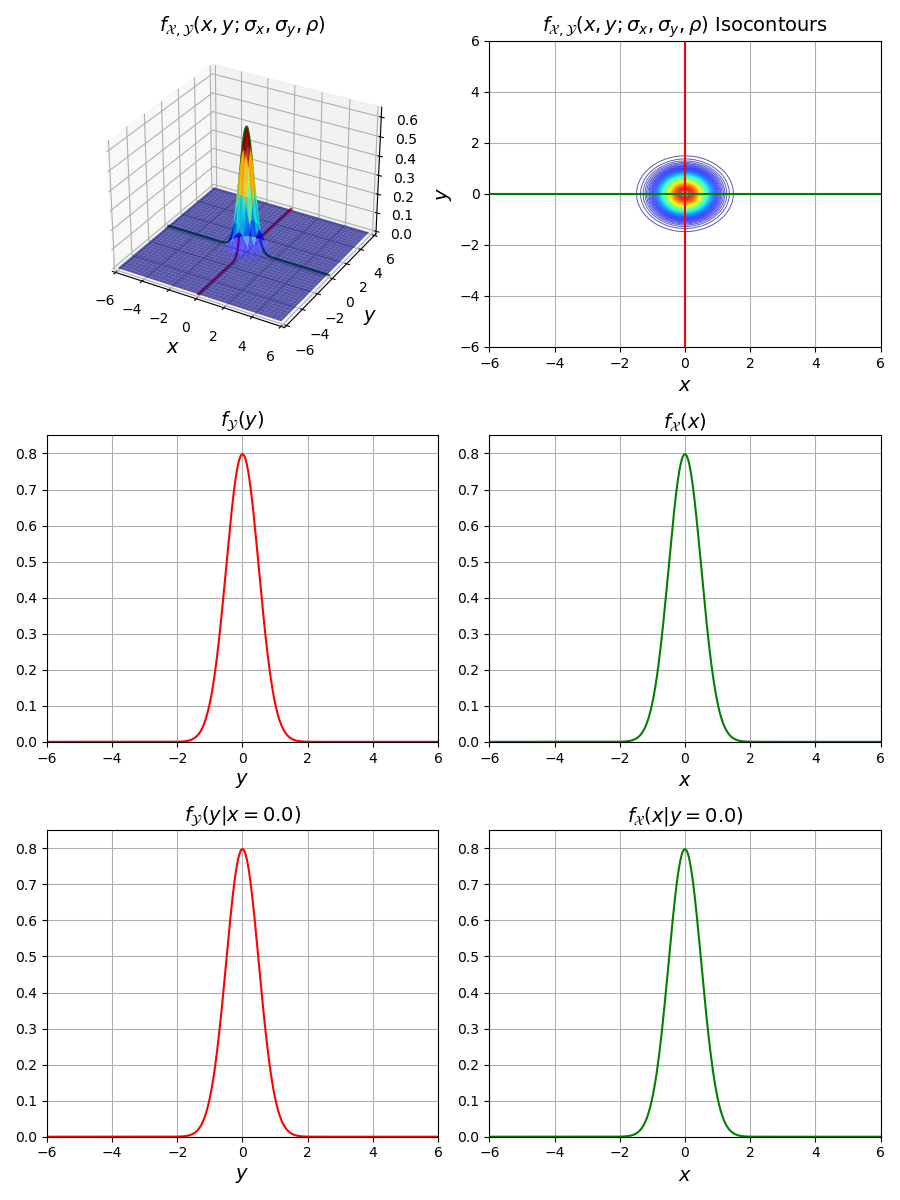

interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=0.0, descr…

In [16]:
def Gaussian_MVG(xrange, yrange, sigx, sigy, rho):
    denom = 2 * np.pi * np.sqrt((sigx**2) * (sigy**2) * (1 - rho**2))
    arg = (1/((sigx**2) * (sigy**2) * (1 - rho**2))) * ( (sigy**2)*(xrange**2) 
                                                        + (sigx**2)*(yrange**2) 
                                                        - 2*rho*sigx*sigy*xrange*yrange)
    pdf = (1/denom) * np.exp(-0.5*arg)
    z = pdf
    return z

def Gaussian_MVG_x(xrange, sigx):
    denom = 2 * np.pi * (sigx**2)
    arg = (xrange**2)/(sigx**2)
    pdf = (1/np.sqrt(denom)) * np.exp(-0.5*arg)
    z = pdf
    return z

def Gaussian_MVG_y(yrange, sigy):
    denom = 2 * np.pi * (sigy**2)
    arg = (yrange**2)/(sigy**2)
    pdf = (1/np.sqrt(denom)) * np.exp(-0.5*arg)
    z = pdf
    return z

def Gaussian_MVG_xcondy(xrange, y, sigx, sigy, rho):
    pdf1 = Gaussian_MVG(xrange, y, sigx, sigy, rho)
    pdf2 = Gaussian_MVG_y(y, sigy)
    z = pdf1 / pdf2
    return z

def Gaussian_MVG_ycondx(yrange, x, sigx, sigy, rho):
    pdf1 = Gaussian_MVG(x, yrange, sigx, sigy, rho)
    pdf2 = Gaussian_MVG_x(x, sigx)
    z = pdf1 / pdf2
    return z

#[sigx, sigy, rho] = [0.5, 0.5, 0]

fig = plt.figure(figsize=(9,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.4,
                    wspace=0.5)

ax1 = fig.add_subplot(3,2,1, projection="3d")
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

def plot_delta_lines(x, y, sigx, sigy, rho):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()

    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_ylabel('$y$', fontsize=14)
    ax2.set_xlabel('$x$', fontsize=14)
    ax2.set_ylabel('$y$', fontsize=14)
    ax3.set_xlabel('$y$', fontsize=14)
    ax4.set_xlabel('$x$', fontsize=14)
    ax5.set_xlabel('$y$', fontsize=14)
    ax6.set_xlabel('$x$', fontsize=14)

    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(-6, 6)
    ax3.set_xlim(-6, 6)
    ax3.set_ylim(0, 0.85)
    ax4.set_xlim(-6, 6)
    ax4.set_ylim(0, 0.85)
    ax5.set_xlim(-6, 6)
    ax5.set_ylim(0, 0.85)
    ax6.set_xlim(-6, 6)
    ax6.set_ylim(0, 0.85)

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()
    ax6.grid()

    x_line = np.linspace(-6, 6, 1000)
    y_line = np.linspace(-6, 6, 1000)

    x_range, y_range = np.mgrid[-6:6:.1, -6:6:.1]
    pos = np.dstack((x_range, y_range))
    rv = multivariate_normal([0, 0], [[sigx**2, rho*sigx*sigy], [rho*sigx*sigy, sigy**2]])
    ax1.plot_surface(x_range, y_range, rv.pdf(pos), cmap=plt.cm.jet, alpha=0.65)
    ax2.contour(x_range, y_range, rv.pdf(pos), 100, cmap=plt.cm.jet, linewidths=0.7, alpha=0.65)
    
    title2 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y; \sigma_x, \sigma_y, \rho)$ Isocontours"
    ax2.set_title(title2, fontsize=14)

    y_prob = Gaussian_MVG_y(y_line, sigy)
    ax3.plot(y_line, y_prob, color="red")

    x_prob = Gaussian_MVG_x(x_line, sigx)
    ax4.plot(x_line, x_prob, color="green")

    title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y)$"
    ax1.set_title(title1, fontsize=14)
    title3 = r"$f_{\mathcal{Y}}(y)$"
    ax3.set_title(title3, fontsize=14)
    title4 = r"$f_{\mathcal{X}}(x)$"
    ax4.set_title(title4, fontsize=14)

    
    x1_range = np.linspace(x, x, 500)
    y1_range = np.linspace(-6, 6, 500)
    z1 = Gaussian_MVG(x1_range, y1_range, sigx, sigy, rho)
    
    x2_range = np.linspace(-6, 6, 500)
    y2_range = np.linspace(y, y, 500)
    z2 = Gaussian_MVG(x2_range, y2_range, sigx, sigy, rho)

    ax1.plot(x1_range, y1_range, z1, color="red")
    ax1.plot(x2_range, y2_range, z2, color="green")
    ax2.plot(x1_range, y1_range, color="red")
    ax2.plot(x2_range, y2_range, color="green")


    y_vert_x = Gaussian_MVG_ycondx(y1_range, x, sigx, sigy, rho)
    ax5.plot(y1_range, y_vert_x, color="red")

    x_vert_y = Gaussian_MVG_xcondy(x2_range, y, sigx, sigy, rho)
    ax6.plot(x2_range, x_vert_y, color="green")

    title1 = r"$f_{\mathcal{X}, \mathcal{Y}}(x, y; \sigma_x, \sigma_y, \rho)$"
    ax1.set_title(title1, fontsize=14)
    title5 = r"$f_{\mathcal{Y}}(y | x=$" + str(round(x,1)) +"$)$"
    ax5.set_title(title5, fontsize=14)
    title6 = r"$f_{\mathcal{X}}(x | y=$" + str(round(y,1)) +"$)$"
    ax6.set_title(title6, fontsize=14)

    plt.show()

    
int_plot = interact(plot_delta_lines, 
                    x = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1),
                    y = widgets.FloatSlider(value=0, min=-6, max=6.0, step=0.1),
                    sigx = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description = '$\sigma_x$'),
                    sigy = widgets.FloatSlider(value=0.5, min=0.1, max=3.0, step=0.1, description = '$\sigma_y$'),
                    rho = widgets.FloatSlider(value=0.0, min=-0.9, max=0.9, step=0.1, description = r'$\rho$')
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. - With the $\rho$ slider set to zero, try varying the $x$ and $y$ sliders. What do you notice about how the conditional distributions vary?

   - With the $\rho$ slider set to a non-zero value, try varying the $x$ and $y$ sliders. What do you notice about how the conditional distributions vary?

2. Prove that $\mathcal{X}$ and $\mathcal{Y}$ are dependent if $\rho \neq 0$ and independent if $\rho = 0$.
</div>

<div class=answer>
<b>Answer:</b>
    
1. - With $\rho=0$ the conditional distributions do not vary
   - With $\rho \neq0$ the conditional distributions do vary, they are dependent on the setting of $x$ and $y$ respectively.

2. We observe that:
    
    \begin{align}
	f_{\mathcal{X},\mathcal{Y}}(x, y ; \sigma_x, \sigma_y, \rho) &= \frac{1}{2 \pi \sigma_x \sigma_y\sqrt{(1-\rho^2)}} \exp \left( -\frac{1}{2}   \frac{ \sigma_y^2 x^2 + \sigma_x^2 y^2 - 2\rho \sigma_x \sigma_y x y }{\sigma_x^2 \sigma_y^2  (1 - \rho^2)}              \right)   \\
    &= \frac{1}{(2 \pi)^{1/2} \sigma_x}\exp \left( -\frac{1}{2}   \frac{ x^2 }{\sigma_x^2 (1-\rho^2)} \right) \times \frac{1}{(2 \pi)^{1/2} \sigma_y}\exp \left( -\frac{1}{2}   \frac{ y^2 }{\sigma_y^2 (1-\rho^2)} \right)  \\
    &\qquad \times \frac{1}{(1-\rho^2)^{1/2}}\exp \left(    \frac{ \rho x y }{\sigma_x \sigma_y (1-\rho^2)} \right)  \\
    \implies f_{\mathcal{X},\mathcal{Y}}(x, y ; \sigma_x, \sigma_y, \rho=0) &= f_{\mathcal{X}}(x ; \mu_x, \sigma_x) f_{\mathcal{Y}}(y ; \mu_y, \sigma_y) \implies \mbox{independence}\\
    \implies f_{\mathcal{X},\mathcal{Y}}(x, y ; \sigma_x, \sigma_y, \rho \neq 0) &\neq f_{\mathcal{X}}(x ; \mu_x, \sigma_x) f_{\mathcal{Y}}(y ; \mu_y, \sigma_y) \implies \mbox{dependence}
\end{align}
    
    <b>Note that here the zero valued correlation between  $\mathcal{X}$ and $\mathcal{Y}$ does imply and is implied by their independence<b> 
    
    
</div>

<a id='section_MVG'></a>
## 4. The Multivariate Gaussian Revisited

Since we will use the MVG distribution in a wide variety of settings, then it's worth revisiting it to state some other of its properties:

### Marginal Distribution
To obtain the **marginal** distribution over a subset of random variables within a multivariate Gaussian we need only drop the irrelevant variables from the mean vector and the covariance matrix:

For multivariate Gaussian random variables $\boldsymbol{\mathcal{X}} = [\boldsymbol{\mathcal{X}}_{1}^T$, $\boldsymbol{\mathcal{X}}_{2}^T]^T$, with outcomes $\mathbf{x}= [\mathbf{x}_{1}^T$, $\mathbf{x}_{2}^T]^T$, so that $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where:

\begin{align*}
    \boldsymbol{\mu} = \begin{bmatrix}
    \boldsymbol{\mu}_1\\
    \boldsymbol{\mu}_2\\
    \end{bmatrix},
    \qquad
    \boldsymbol{\Sigma} = \begin{bmatrix}
    \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
    \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}\\
    \end{bmatrix},
    \qquad
    \boldsymbol{\Lambda} = \boldsymbol{\Sigma}^{-1} = \begin{bmatrix}
    \boldsymbol{\Lambda}_{11} & \boldsymbol{\Lambda}_{12}\\
    \boldsymbol{\Lambda}_{21} & \boldsymbol{\Lambda}_{22}\\
    \end{bmatrix}			
\end{align*}
		
Then the **marginals** are distributed like a multivariate Gaussian, with the following characterisation:

\begin{align*}
    \mathbf{x}_1 &\sim \mathcal{N}(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_{11}) \\
    \mathbf{x}_2 &\sim \mathcal{N}(\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_{22})
\end{align*}

### Conditional Distribution
The **conditionals** are distributed like an MVG, with the following characterisation:

\begin{equation*}
    \mathbf{x}_1 \vert \mathbf{x}_2 \sim \mathcal{N}(\boldsymbol{\mu}_{1 \vert 2}, \boldsymbol{\Sigma}_{1 \vert 2})
\end{equation*}
Where:

\begin{align*}
    \boldsymbol{\mu}_{1 \vert 2} &= \boldsymbol{\mu}_{1} - \boldsymbol{\Lambda}_{1 1}^{-1} \boldsymbol{\Lambda}_{1 2} (\mathbf{x}_2 - \boldsymbol{\mu}_{2}) \\
    \boldsymbol{\Sigma}_{1 \vert 2} &= \boldsymbol{\Sigma}_{1 1} - \boldsymbol{\Sigma}_{1 2} \boldsymbol{\Sigma}_{2 2}^{-1} \boldsymbol{\Sigma}_{2 1} = \boldsymbol{\Lambda}_{1 1}^{-1}
\end{align*}
        
### Linear Gaussian
A **linear Gaussian model** is one characterised as follows:

\begin{align*}
    \mathbf{x}_1 &\sim \mathcal{N}(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_{11}) \\
    \mathbf{x}_2 \vert \mathbf{x}_1 &\sim \mathcal{N}(\mathbf{A}\mathbf{x}_1 + \mathbf{b}, \mathbf{L}^{-1})
\end{align*}

Analogous reasoning to that used in the derivation of the conditional distribution implies that:

\begin{align*}
    \mathbf{x}_2 &\sim \mathcal{N}(\mathbf{A}\boldsymbol{\mu}_1 + \mathbf{b}, \mathbf{L}^{-1} + \mathbf{A}\boldsymbol{\Sigma}_{11}\mathbf{A}^{T}) \\
    \mathbf{x}_1 \vert \mathbf{x}_2 &\sim \mathcal{N}(\boldsymbol{\Sigma}_{1|2} [ \mathbf{A}^{T} \mathbf{L} (\mathbf{x}_2 - \mathbf{b}) + \boldsymbol{\Sigma}_{11}^{-1}\boldsymbol{\mu}_1], \boldsymbol{\Sigma}_{1|2})
\end{align*}
Where: $\boldsymbol{\Sigma}_{1|2} = (\boldsymbol{\Sigma}_{11}^{-1} + \mathbf{A}^{T}\mathbf{L}\mathbf{A})^{-1}$
        
### Affine Transformation
A limiting case of the linear gaussian model is displayed in the **affine transformation** of a MVG-distributed random variable:

For random variables $\boldsymbol{\mathcal{X}}_1$, $\boldsymbol{\mathcal{X}}_2$, with outcomes $\mathbf{x}_1$, $\mathbf{x}_2$, respectively, if $\boldsymbol{\mathcal{X}}_2 = \mathbf{A}\boldsymbol{\mathcal{X}}_1 + \mathbf{b}$, where $\mathbf{x}_1 \sim \mathcal{N}(\boldsymbol{\mu}_1,\boldsymbol{\Sigma}_{11})$, then:

\begin{equation*}
    \mathbf{x}_2 \sim \mathcal{N}(\mathbf{A}\boldsymbol{\mu}_1 + \mathbf{b},\mathbf{A}\boldsymbol{\Sigma}_{11}\mathbf{A}^T)
\end{equation*}

### Correlation & Independence

As illustrated in "EX3: Bivariate Gaussian Distribution", the MVG distribution is a special case wherein:
 
<p style="text-align: center;">
If two variables are within a MVG are independent, this <strong>implies</strong> they are uncorrelated.
</p>
<p style="text-align: center;">
If two variables within a MVG are uncorrelated, this <strong>does not imply</strong> they are independent in general.    
</p>

In other words, for the particular case of the MVG there is an equivalence between correlation and independence between random variables

<div class=question>
<b>Exercise:</b>
    
Use the general relationships for marginal and conditional distributions to derive the particular 2-dimensional relationships which we stated in "EX3: Bivariate Gaussian Distribution".
</div>

<div class=answer>
<b>Answer:</b>
 
Results follow given the following substitutions:
\begin{equation}
    \boldsymbol{\mathcal{X}} = [\mathcal{X}, \mathcal{Y}]^T \qquad \mbox{and} \qquad \mathbf{x} = [x, y]^T
\end{equation}

And:

\begin{align*}
    \boldsymbol{\mu} = \begin{bmatrix}
    \mu_x\\
    \mu_y\\
    \end{bmatrix},
    \qquad
    \boldsymbol{\Sigma} = \begin{bmatrix}
    \sigma_{x}^2 & \rho \sigma_{x} \sigma_{y}\\
    \rho \sigma_{x} \sigma_{y} & \sigma_{y}^2\\
    \end{bmatrix},
    \qquad
    \boldsymbol{\Lambda} = \frac{1}{\sigma_{x}^2\sigma_{y}^2(1-\rho^2)}\begin{bmatrix}
    \sigma_{y}^2 & -\rho \sigma_{x} \sigma_{y}\\
    -\rho \sigma_{x} \sigma_{y} & \sigma_{x}^2\\
    \end{bmatrix}			
\end{align*}

</div>


<a id='section_ConcInequality'></a>
## 5. Concentration Inequalities & Limit Theorems

**Concentration inequalities** provide probabilistic bounds on how a random variable deviates from some value. They are often used in theoretical machine learning to prove the efficacy of certain algorithms. 

For our purposes, **Limit Theorems** deal with the limiting behaviour of the sum of indpendent random variables as the summands become large. Often we may be interested in how the average of a set of random variable sis distributed, but formulating such distributions is a non-trivial task, however it often suffices to make statements about the limiting behaviour of these distributions in such circumstances.

Let us begin by taking a look at concentration inequalities:

### Markov's Inequality
Markov's Inequality expresses the probability of one sided deviation of a non-negative random variable:

Let $\mathcal{X}$ be a random variable which is non-negative, with expectation $\mu$. 

Then, for every constant $\alpha > 0$:

\begin{equation*}
    \mathbb{P}(\mathcal{X} \geq \alpha) \leq \frac{\mu}{\alpha}
\end{equation*}

Let's illustrate this with the Beta distribution:

<IPython.core.display.Javascript object>


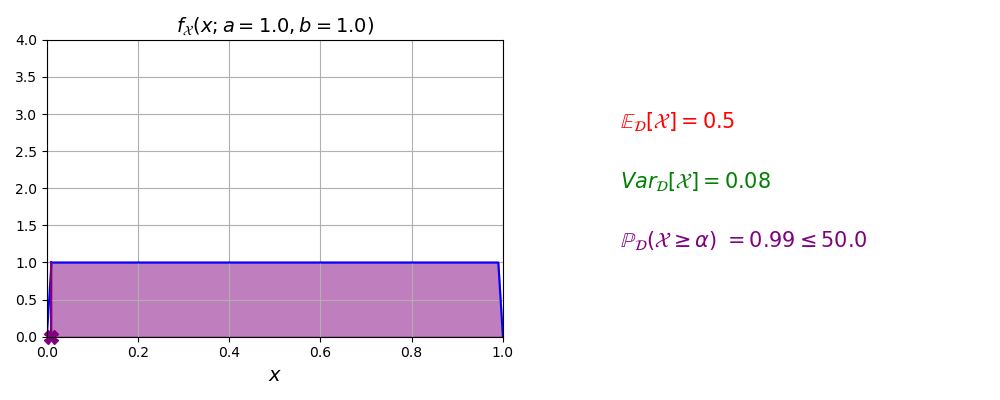

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

In [17]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Beta(a, b, alpha):
    Exp = a/(a+b)
    Var = a*b/((a+b)**2 * (a+b+1))

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 4)

    ax2.clear()
    ax2.set_axis_off()

    x_range = np.linspace(0, 1, 100)
    y = beta.pdf(x_range, a, b)
    line1, = ax1.plot(x_range, y, color="blue")
    point3, = ax1.plot([alpha], [0], marker="X", markersize=10, 
                       markeredgecolor="purple", markerfacecolor="purple", clip_on=False)

    x_range_pdf = np.linspace(alpha, 1.0, 100)
    y_pdf = beta.pdf(x_range_pdf, a, b)
    ax1.fill_between(x_range_pdf, y_pdf, alpha=0.5, facecolor = 'purple', edgecolor = 'purple')
    ax1.plot([alpha, alpha], [0, y_pdf[0]], color='purple')

    title1 = '$f_{\mathcal{X}}(x; a =$' + str(round(a,1)) +  '$, b=$' + str(round(b,1)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.7, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.5, '${Var}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Var,2)), 
             color = 'g', fontsize = 15)
    ax2.text(0.2, 0.3, '$\mathbb{P}_{\mathcal{D}} (\mathcal{X} \geq$' + r'$\alpha$' + ') $= $' 
             + str(round(1-beta.cdf(alpha, a, b),2))
             + '$\leq$'
             + str(round(Exp/alpha,2)), 
             color = 'purple', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Beta, 
                    a = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1),
                    b = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1),
                    alpha = widgets.FloatSlider(value=0.01, min=0.01, max=1, step=0.01, description = r'$\alpha$')
                   )
plt.show()

### Chebyshev's Inequality
Chebyshev's Inequality expresses the probability of two sided deviation of a variable:

Let $\mathcal{X}$ be a random variable, for which the expectation, $\mu$, and variance, $\sigma^2$, are finite.
	
Then, for every constant $\alpha>0$:

\begin{align*}
    \mathbb{P}(\vert \mathcal{X} - \mu \vert \geq \alpha) &\leq \frac{\sigma^2}{\alpha^2} \\
    \implies \mathbb{P}(\mathcal{X} \geq \mu + \alpha) + \mathbb{P}(\mathcal{X} \leq \mu - \alpha) &\leq \frac{\sigma^2}{\alpha^2}
\end{align*}

Let's illustrate this with the Gaussian distribution:

<IPython.core.display.Javascript object>


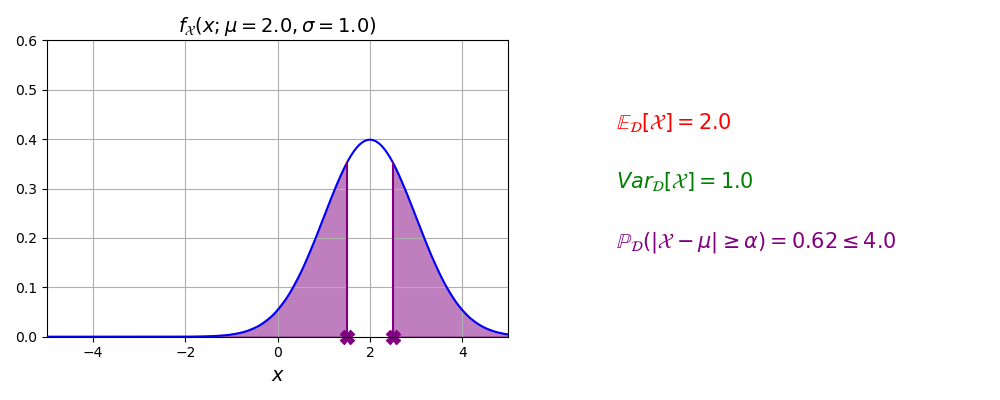

interactive(children=(FloatSlider(value=2.0, description='$\\mu$', max=5.0, min=-5.0, step=1.0), FloatSlider(v…

In [18]:
plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Norm(mu, sigma, alpha):
    Exp = mu
    Var = sigma**2

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(0, 0.6)

    ax2.clear()
    ax2.set_axis_off()

    x_range = np.linspace(-30, 30, 1000)
    y = norm.pdf(x_range, mu, sigma)
    line1, = ax1.plot(x_range, y, color="blue")
    ax1.plot([mu + alpha], [0], marker="X", markersize=10, 
                       markeredgecolor="purple", markerfacecolor="purple", clip_on=False)
    ax1.plot([mu - alpha], [0], marker="X", markersize=10, 
                       markeredgecolor="purple", markerfacecolor="purple", clip_on=False)

    x_range_pdf_1 = np.linspace(-30.0, mu - alpha, 100)
    y_pdf_1 = norm.pdf(x_range_pdf_1, mu, sigma)
    ax1.fill_between(x_range_pdf_1, y_pdf_1, alpha=0.5, facecolor = 'purple', edgecolor = 'purple')
    ax1.plot([mu-alpha, mu-alpha], [0, y_pdf_1[-1]], color='purple')

    x_range_pdf_2 = np.linspace(mu + alpha, 30.0, 100)
    y_pdf_2 = norm.pdf(x_range_pdf_2, mu, sigma)
    ax1.fill_between(x_range_pdf_2, y_pdf_2, alpha=0.5, facecolor = 'purple', edgecolor = 'purple')
    ax1.plot([mu+alpha, mu+alpha], [0, y_pdf_2[0]], color='purple')

    

    title1 = '$f_{\mathcal{X}}(x; \mu =$' + str(round(mu,1)) +  '$, \sigma=$' + str(round(sigma,1)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.7, '$\mathbb{E}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.5, '${Var}_{\mathcal{D}} [\mathcal{X}] =$' + str(round(Var,2)), 
             color = 'g', fontsize = 15)
    ax2.text(0.2, 0.3, 
             '$\mathbb{P}_{\mathcal{D}} ($' + r'$\vert$' + '$\mathcal{X} - $' + r'$\mu$' + r'$\vert$'
             + '$\geq $'
             + r'$\alpha$'
             + '$) = $'
             + str(round(norm.cdf(mu-alpha, mu, sigma) + 1 - norm.cdf(mu+alpha, mu, sigma),2))
             + '$\leq$'
             + str(round(sigma**2/alpha**2,2)), 
             color = 'purple', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Norm, 
                    mu = widgets.FloatSlider(value=2.0, min=-5, max=5, step=1, description = '$\mu$'),
                    sigma = widgets.FloatSlider(value=1.0, min=0.1, max=2, step=0.01, description = '$\sigma$'),
                    alpha = widgets.FloatSlider(value=0.5, min=0.01, max=5.0, step=0.01, description = r'$\alpha$')
                   )
plt.show()

### Hoeffding's Inequality
**Hoeffding's Inequality** is a concentration inequality which seeks to bound deviations of the empirical mean of a set of random numbers from its expectation.

Let $\mathcal{X}_1$, $\mathcal{X}_2$,..., $\mathcal{X}_i$,... be a sequence of independent random variables, such that each is bounded to be in the interval $[a_i, b_i]$, and let $\overline{\mathcal{X}}_n = \frac{1}{n} \sum_{i=1}^{n} \mathcal{X}_i$ be the empirical mean of these random variables. 

Then for any $\epsilon > 0$:

\begin{equation*}
		\mathbb{P}\left( \overline{\mathcal{X}} - \mathbb{E}[\overline{\mathcal{X}}] \geq \epsilon \right) \leq \exp \left( -\frac{2 n^2 \epsilon^2}{\sum_{i=1}^{n} (b_i - a_i)^2}    \right)
	\end{equation*}
	And:
		\begin{equation*}
		\mathbb{P}\left( \vert \overline{\mathcal{X}} - \mathbb{E}[\overline{\mathcal{X}}] \vert \geq \epsilon \right) \leq 2 \exp \left( -\frac{2 n^2 \epsilon^2}{\sum_{i=1}^{n} (b_i - a_i)^2}    \right)
	\end{equation*}


Now let's turn pur attention to limit theorems:

### Law of Large Numbers
The **law of large numbers** describes the result of performing the same experiment many times. There are a variety of different versions, we'll describe one - the so called **weak law of large numbers**.

Let $\mathcal{X}_1$, $\mathcal{X}_2$,..., $\mathcal{X}_i$,... be a sequence of independent random variables, with expectation, $\mu$, and variance, $\sigma^2$, and let $\overline{\mathcal{X}}_n = \frac{1}{n} \sum_{i=1}^{n} \mathcal{X}_i$. 

Then for any $\epsilon > 0$:

\begin{align*}
    \mathbb{P} \left(\vert \overline{\mathcal{X}}_n - \mu \vert \geq \epsilon \right) &\rightarrow 0 \qquad \mbox{as} \qquad n \rightarrow \infty
\end{align*}

We can see that the weak law of large numbers looks like a limiting case of Hoeffding's inequality (albeit that the fomer applies only to bounded random variables, and the latter only applies to random variables with similar mean and variance).

Let's illustrate both of them with a distribution that is covered by boith of them - the uniform distribution: 

Let $\mathcal{X}_i$ be characterised as uniform random variables on the range $[0,1]$, with a pdf given by: 

\begin{equation}
	f_{\mathcal{X}_i}(x_i ; 0, 1) = \mathbb{I}[0 \leq x_i \leq 1]
\end{equation}

For this distribution the average is distributed like a [**Bates distribution**](https://en.m.wikipedia.org/wiki/Bates_distribution), with a pdf given by:

\begin{equation}
    f_{\overline{\mathcal{X}}_n}(\overline{x})=\frac{n}{2(n-1)!} \sum_{k=0}^n (-1)^k \binom{n}{k}(n\overline{x} - k)^{(n-1)} \mbox{sgn}(n\overline{x} -k)
\end{equation}

Where 
$\begin{cases}
    \mbox{sgn}(n\overline{x}-k)&=&-1,\ & \text{if} \   \ n\overline{x}<k\\ 
    \mbox{sgn}(n\overline{x}-k)&=& \ \  \ 0, & \text{if} \   \ n\overline{x}=k\\  
    \mbox{sgn}(n\overline{x} -k)&=& \ \  \ 1, &\text{if} \  \ nx > k \  
\end{cases}$

<IPython.core.display.Javascript object>


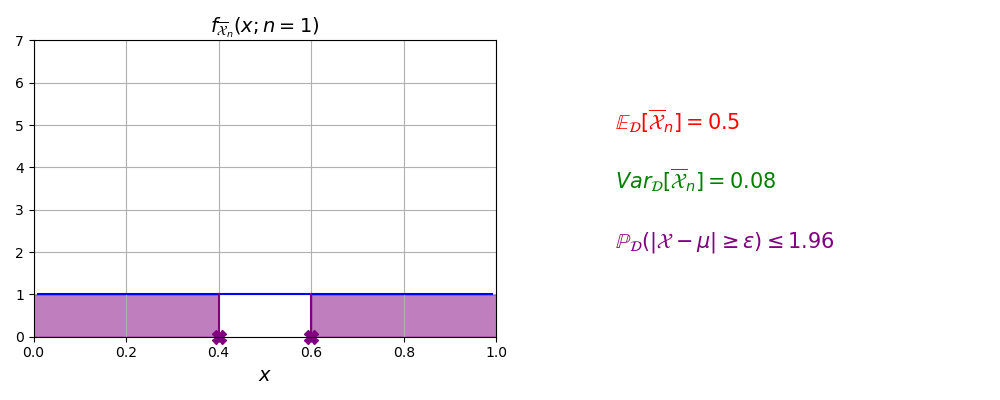

interactive(children=(IntSlider(value=1, description='n', max=25, min=1), FloatSlider(value=0.1, description='…

In [19]:
def Bates_pdf(x, n):
    f = np.zeros(len(x))
    for i in range(0, (len(x))):
        g = 0
        for k in range(0, n+1):
            sgn_indic = 0
            if (n*x[i])<k:
                sgn_indic = -1
            elif (n*x[i])>k:  
                sgn_indic = 1
            g += ((-1)**k) * comb(n, k) * ((n*x[i] - k)**(n-1)) * sgn_indic
        f[i] = (n/(2*fac(n-1)))*g
    return f



plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_Bates(n, epsilon):
    Exp = 0.5
    Var = 1/(12*n)

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 7)

    ax2.clear()
    ax2.set_axis_off()

    x_range = np.linspace(0.01, 0.99, 1000)
    y = Bates_pdf(x_range, n)
    line1, = ax1.plot(x_range, y, color="blue")
    ax1.plot([Exp + epsilon], [0], marker="X", markersize=10, 
                       markeredgecolor="purple", markerfacecolor="purple", clip_on=False)
    ax1.plot([Exp - epsilon], [0], marker="X", markersize=10, 
                       markeredgecolor="purple", markerfacecolor="purple", clip_on=False)

    x_range_pdf_1 = np.linspace(0.0, Exp - epsilon, 1000)
    y_pdf_1 = Bates_pdf(x_range_pdf_1, n)
    ax1.fill_between(x_range_pdf_1, y_pdf_1, alpha=0.5, facecolor = 'purple', edgecolor = 'purple')
    ax1.plot([Exp-epsilon, Exp-epsilon], [0, y_pdf_1[-1]], color='purple')

    x_range_pdf_2 = np.linspace(Exp + epsilon, 1.0, 1000)
    y_pdf_2 = Bates_pdf(x_range_pdf_2, n)
    ax1.fill_between(x_range_pdf_2, y_pdf_2, alpha=0.5, facecolor = 'purple', edgecolor = 'purple')
    ax1.plot([Exp+epsilon, Exp+epsilon], [0, y_pdf_2[0]], color='purple')

    title1 = '$f_{\overline{\mathcal{X}}_n}(x; n =$' + str(n) + '$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.7, '$\mathbb{E}_{\mathcal{D}} [{\overline{\mathcal{X}}_n}] =$' + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.5, '${Var}_{\mathcal{D}} [{\overline{\mathcal{X}}_n}] =$' + str(round(Var,2)), 
             color = 'g', fontsize = 15)
    ax2.text(0.2, 0.3, 
             '$\mathbb{P}_{\mathcal{D}} ($' + r'$\vert$' + '$\mathcal{X} - $' + r'$\mu$' + r'$\vert$'
             + '$\geq $'
             + r'$\epsilon$'
             + '$)\leq$'
             + str(round(2*np.exp(-2* (n**2) * (epsilon**2)),2)), 
             color = 'purple', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Bates, 
                    n = widgets.IntSlider(value=1, min=1, max=25, step=1),
                    epsilon = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, 
                                                  description = r'$\epsilon$')
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
Try increasing the value of $n$. What pdf does the shape of the resulting distribution remind you of? 

</div>

<div class=answer>
<b>Answer:</b>
    
As $n$ becomes large then the pdf begins to look like a normal distribution. This is to be expected due to the <b>Central Limit Theorem</b>: 

</div>

### Central Limit Theorem
The **central limit theorem** is concerned with the limiting distribution of sums of random variables.

Let $\mathcal{X}_1$, $\mathcal{X}_2$,..., $\mathcal{X}_i$,... be a sequence of independent random variables, with expectation, $\mu$, and variance, $\sigma^2$, and let $\mathcal{S}_n = \sum_{i=1}^{n} \mathcal{X}_i$. 

Then:

\begin{align*}
    \mbox{The distribution of} \quad \left(\frac{\mathcal{S}_n - n \mu}{\sigma \sqrt{n}}\right) \quad \rightarrow \quad \mathcal{N}(0,1) \qquad \mbox{as} \qquad n \rightarrow \infty
\end{align*}

Let's illustrate this with $\mathcal{X}_i$ characterised as Bernoulli random variables, with a pmf given by: 

\begin{align}
	\mathcal{X}_i &\sim \mbox{Bern}(\theta) \\
    \mu &= \theta \\
    \sigma &= \sqrt{\theta(1-\theta)}
\end{align}

For this distribution the sum is distributed like a Binomial distribution, with a pmf given by:

\begin{equation}
	\mathcal{S}_n \sim \mbox{Bin}(n, \theta)
\end{equation}

And therefore the pmf of $\mathcal{Y} = \left(\frac{\mathcal{S}_n - n \mu}{\sigma \sqrt{n}}\right)$ is in this case:
\begin{equation}
    p_{\mathcal{Y}}\left(y =  \frac{k - n\mu}{\sigma\sqrt{n}} ; n, \theta \right) = \sigma\sqrt{n}\binom{n}{k} \theta^k (1-\theta)^{n-k}	
\end{equation}

NB: The outcomes of $\mathcal{Y}$ can only take values $\left\{\frac{k - n\mu}{\sigma\sqrt{n}} \right\}_{k=1}^n$ 

<IPython.core.display.Javascript object>


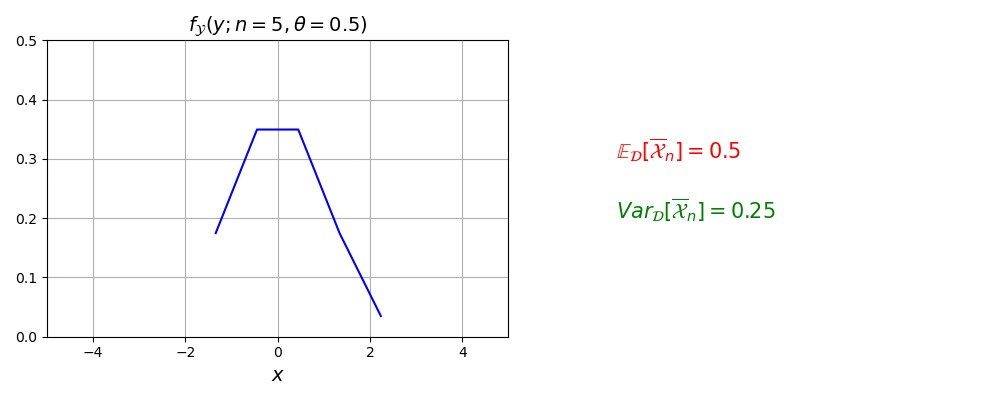

interactive(children=(IntSlider(value=5, description='n', max=500, min=1), FloatSlider(value=0.5, description=…

In [20]:
def modified_Bin_pdf(theta, n):
    f = np.zeros(n)
    y = np.zeros(n)
    mu = theta
    sigma = sqrt(theta*(1-theta))
    
    for i in range(0, n):
        k = i+1
        k_tilde = (k - n*mu)/(sigma*sqrt(n))
        y[i] = k_tilde
        f[i] = sigma*sqrt(n)*comb(n, k)*(theta**k)*((1-theta)**(n-k))
    return y, f



plt.close('all')
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

def plot_modified_Bin(n, theta, checkbox0):
    mu = theta
    sigma = sqrt(theta*(1-theta))

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$x$', fontsize=14)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(0, 0.5)

    ax2.clear()
    ax2.set_axis_off()

    y,f = modified_Bin_pdf(theta, n)
    ax1.plot(y, f, color="blue")

    if checkbox0 == 1:
        x_range = np.linspace(-5, 5, 1000)
        ax1.plot(x_range, norm.pdf(x_range, 0, 1), color="r")

    title1 = '$f_{\mathcal{Y}}(y; n =$' + str(n) + '$,$' + r'$\theta =$' + str(round(theta,2)) +'$)$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.2, 0.6, '$\mathbb{E}_{\mathcal{D}} [{\overline{\mathcal{X}}_n}] =$' + str(round(mu,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.2, 0.4, '${Var}_{\mathcal{D}} [{\overline{\mathcal{X}}_n}] =$' + str(round(sigma**2,2)), 
             color = 'g', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_modified_Bin, 
                    n = widgets.IntSlider(value=5, min=1, max=500, step=1),
                    theta = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, 
                                                  description = r'$\theta$'),
                    checkbox0 = widgets.Checkbox(description = 'Plot $\mathcal{N}(0,1)$ distribution', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. Try changing the values of $n$ and $\theta$. What do you notice as $n$ gets large, regardless of the value of $\theta$?
    
2. Can you explain the form of the pmf which characterises $\mathcal{Y}$?

</div>

<div class=answer>
<b>Answer:</b>
    
1. As $n$ gets large, regardless of the value of $\theta$, the distribution tends towards the standard normal.
    
2. By the CLT as $n \rightarrow \infty$ the pmf which characterises $\mathcal{Y}$ should tend to the standard normal.

</div>

<a id='section_SampleStats'></a>
## 6. Sample Statistics

Earlier we defined statistics that described summary properties for the entire population of data outcomes - population statistics. Now we turn our attention to analagous quantities for more limited empirical
samples of data outcomes - **sample statistics**.

We'll take a look at some univariate cases before moving on to the more general multivarite setting:

### <ins>Univariate Setting</ins>

### Sample Expectation
We are given some random variable, $\mathcal{X}$, with (population) mean, $\mu$, and (population) variance $\sigma^2$. This random variable has outcomes, $x$. 

We can regard the $i$-th member, $x^{(i)}$, of a sequence of observations of such outcomes as the outcome of a random variable,  $\mathcal{X}^{(i)}$, which is identically distributed to $\mathcal{X}$.

The sequence of $\mathcal{X}^{(i)}$ are iid. Given this, then the **sample expectation** or **sample mean** is the arithmetic average of the random variables:

\begin{equation*}
    \overline{\mathcal{X}} = \mathbb{E}_{\mathcal{S}}[\mathcal{X}] = \frac{1}{n} \sum_{i=1}^n \mathcal{X}^{(i)}	
\end{equation*}

This is itself a random variable with outcomes given by:

\begin{equation*}
    \overline{x} = \frac{1}{n} \sum_{i=1}^n x^{(i)}	
\end{equation*}


#### _Sampling Distribution, Standard Error and Estimate of the Expectation_ 

Since, as we noted, the sample expectation is itself a random variable then it has an associated characteristic probability distribution, and we call this the **sampling distribution** of the mean. 

Let's investigate some properties of this sampling distribution:

The (population) expectation of $\overline{\mathcal{X}}$ itself is given by:

\begin{equation*}
    \mathbb{E}[\overline{\mathcal{X}}] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[\mathcal{X}^{(i)}]	= \mu	
\end{equation*}

And the (population) variance of $\overline{\mathcal{X}}$ is given by:

\begin{equation*}
    \mbox{Var}[\overline{\mathcal{X}}] = \frac{1}{n^2} \sum_{i=1}^n \mbox{Var}[\mathcal{X}^{(i)}]	= \frac{\sigma^2}{n}	
\end{equation*}

The (population) standard deviation of $\overline{\mathcal{X}}$, also known as the **standard error**, is therefore given by:

\begin{equation*}
    \sigma_{\overline{\mathcal{X}}} =  \frac{\sigma}{\sqrt{n}}	
\end{equation*}

And of course, from the central limit theorem, we know that as $n \rightarrow \infty$, then the sampling distribution will tend to:

\begin{equation*}
    \mathcal{N} \left(\mu, \frac{\sigma^2}{n}\right)	
\end{equation*}

In other words as the amount of data which we collect increases then mean of that data is drawn from a distribution which is increasingly concentrated around the population mean and thus we should become increasingly confident that the mean of the observed data gives us a good **estimate** of the population mean. (Note that the sample mean, which is a random variable, is termed the estimator, while its outcome, the mean of the observed data, is the estimate).




    
### Sample Variance
Now let's turn our attention to the **sample variance**. This may be characterised as follows:

\begin{align*}
    \mbox{Var}_{\mathcal{S}}[\mathcal{X}] &= \mathbb{E}_{\mathcal{S}} \left[ (\mathcal{X} - \mathbb{E}_{\mathcal{S}}[\mathcal{X}])^2 \right] \\
    &= \frac{1}{n} \sum_{i=1}^{n}( \mathcal{X}^{(i)}	 - \overline{\mathcal{X}})^2
\end{align*}

Again, this is itself a random variable with outcomes given by:

\begin{equation*}
    s^2 = \frac{1}{n} \sum_{i=1}^{n}( x^{(i)}	 - \overline{x})^2
\end{equation*}


#### _Sampling Distribution of the Variance_ 

Again, since the sample variance is itself a random variable then it has an associated characteristic probability distribution, and we call this the **sampling distribution** of the variance. 

Let's investigate some properties of this sampling distribution:

We can prove that the (population) expectation of $\mbox{Var}_{\mathcal{S}}[\mathcal{X}]$ itself is given by:

\begin{equation*}
    \mathbb{E}[\mbox{Var}_{\mathcal{S}}[\mathcal{X}]] = \sigma^2 \left( \frac{n-1}{n} \right)
\end{equation*}

Note that this is not equal to the population variance, $\sigma^2$, and so we say that $\mbox{Var}_{\mathcal{S}}[\mathcal{X}]$ is a **biased estimator** of $\sigma^2$ (though clearly this bias diminishes as $n$ grows).



We can use this to develop an **unbiased estimate** of $\mbox{Var}[\overline{\mathcal{X}}]$ (the population variance of the sampling distribution of the mean, remember):

\begin{equation*}
    \frac{1}{n (n-1)} \sum_{i=1}^{n}( x^{(i)}	 - \overline{x})^2 = \frac{s^2}{n-1} 
\end{equation*}


Let's illustrate these ideas by observing the behaviour of $n$ samples drawn from the Beta distribution:

<IPython.core.display.Javascript object>


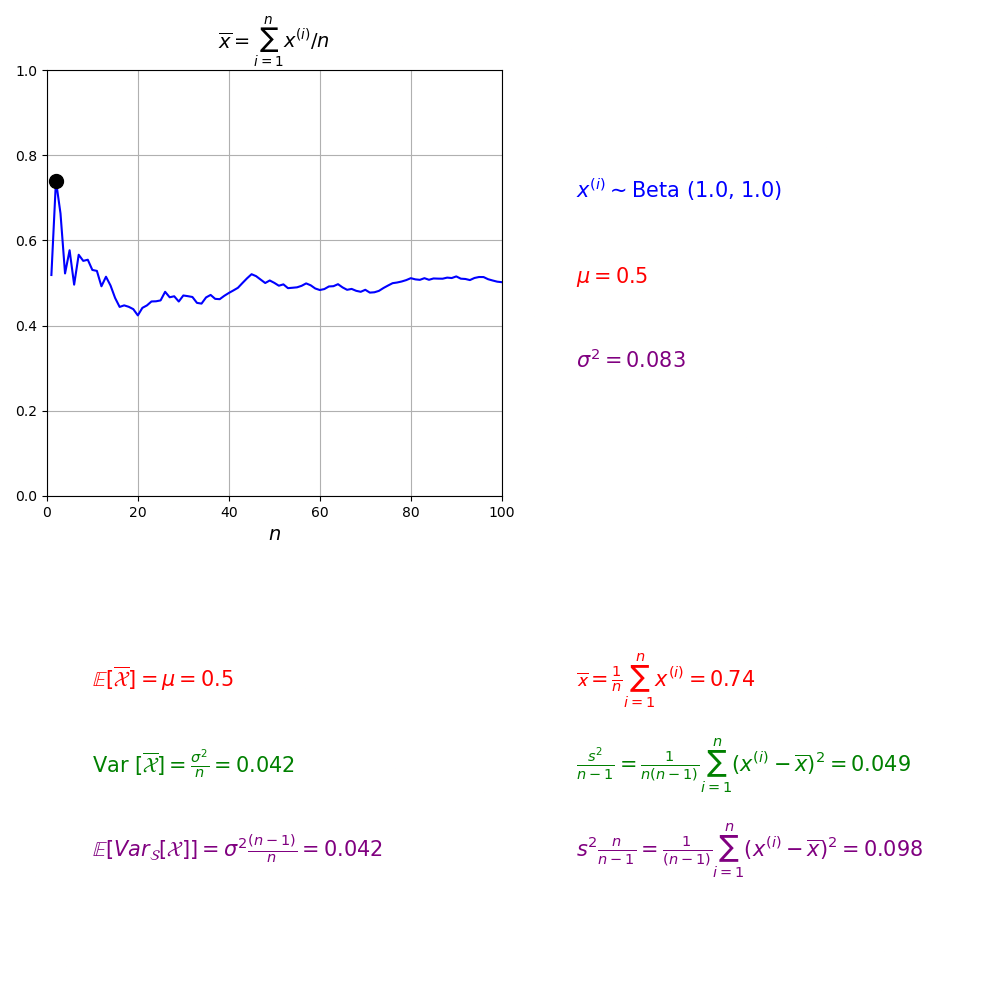

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

In [21]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.1,
                    wspace=0.5)

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

def plot_Sample(a, b, n, checkbox0, checkbox1):
    Exp = a/(a+b)
    Var = a*b/((a+b)**2 * (a+b+1))
    Nb = 100
    np.random.seed(21)
    samples = np.random.beta(a, b, size=Nb)

    ax1.clear()
    ax1.grid()
    ax1.set_xlabel('$n$', fontsize=14)
    ax1.set_xlim(0, Nb)
    ax1.set_ylim(0, 1)

    ax2.clear()
    ax2.set_axis_off()

    ax3.clear()
    ax3.set_axis_off()

    ax4.clear()
    ax4.set_axis_off()

    x = np.zeros(Nb)
    y = np.zeros(Nb)
    z = np.zeros(Nb)
    for i in range(0, Nb):
        x[i] = i+1
        y[i] = sum(samples[0:i+1])/(i+1)
        z[i] = sum( (samples[0:i+1] - y[i])**2 )/(i+1)

    ax1.plot(x, y, color="blue")
    if checkbox0 == 1:
        ax1.plot([0,Nb], [Exp,Exp], color="r", ls='dashed')
    if checkbox1 == 1:
        ax1.plot(x, Exp + (sqrt(Var)/np.sqrt(x)), color="g", ls='dashed')
        ax1.plot(x, Exp - (sqrt(Var)/np.sqrt(x)), color="g", ls='dashed')
        ax1.fill_between(x, Exp + (sqrt(Var)/np.sqrt(x)), Exp - (sqrt(Var)/np.sqrt(x)), 
                     alpha=0.2, facecolor = 'g', edgecolor = 'green')
    ax1.plot([x[n-1]], [y[n-1]], marker="o", markersize=10, 
                       markeredgecolor="black", markerfacecolor="black", clip_on=False)

    title1 = '$\overline{x} = \sum_{i=1}^{n} x^{(i)} / n$'
    ax1.set_title(title1, fontsize=14)

    ax2.text(0.1, 0.7, '$x^{(i)} \sim $'
             + 'Beta ('
             + str(round(a,2)) 
             + ', '
             + str(round(b,2))
             + ')',
             color = 'b', fontsize = 15)
    ax2.text(0.1, 0.5, r'$\mu =$'
             + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax2.text(0.1, 0.3, r'$\sigma^2 =$'
             + str(round(Var,3)), 
             color = 'purple', fontsize = 15)

    ax3.text(0.1, 0.7, '$\mathbb{E} [\overline{\mathcal{X}}] =$' 
             + r'$\mu =$'
             + str(round(Exp,2)), 
             color = 'r', fontsize = 15)
    ax3.text(0.1, 0.5, 'Var $[\overline{\mathcal{X}}] =$' 
             + r'$\frac{\sigma^2}{n} =$'
             + str(round((Var)/n,3)), 
             color = 'g', fontsize = 15)
    ax3.text(0.1, 0.3, '$\mathbb{E} [ {Var}_{\mathcal{S}}[\mathcal{X}]] =$' 
             + r'$\sigma^2\frac{(n-1)}{n} =$'
             + str(round((Var)*(n-1)/n,3)), 
             color = 'purple', fontsize = 15)

    ax4.text(0.1, 0.7, '$\overline{\mathcal{x}} =$'
             + r'$\frac{1}{n}\sum_{i=1}^n x^{(i)} = $' 
             + str(round(y[n-1],2)), 
             color = 'r', fontsize = 15)
    ax4.text(0.1, 0.5, r'$\frac{s^2}{n-1} =$'
             + r'$\frac{1}{n(n-1)}\sum_{i=1}^n(x^{(i)} - \overline{x})^2 =$'
             + str(round(z[n-1]/(n-1),3)), 
             color = 'g', fontsize = 15)
    ax4.text(0.1, 0.3, r'$s^2\frac{n}{n-1} =$'
             + r'$\frac{1}{(n-1)}\sum_{i=1}^n(x^{(i)} - \overline{x})^2 =$'
             + str(round(n*z[n-1]/(n-1),3)), 
             color = 'purple', fontsize = 15)

    plt.show()
    
int_plot = interact(plot_Sample, 
                    a = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1),
                    b = widgets.FloatSlider(value=1.0, min=0.1, max=10, step=0.1),
                    n = widgets.IntSlider(value=2, min=2, max=100, step=1),
                    checkbox0 = widgets.Checkbox(description = 'Plot $\mu$', value=False),
                    checkbox1 = widgets.Checkbox(description = 'Plot $\mu \pm$' + r'$\sqrt{\frac{\sigma^2}{n}}$', value=False)
                   )
plt.show()

<div class=question>
<b>Exercise:</b>
    
1. When we talk of the (population) expectation of $\overline{\mathcal{X}}$, to which population are we referring?
    
2. Derive $\mbox{Var}\left[\overline{\mathcal{X}}\right]$.
    
3. Check that you understand why the unbiased estimator of $\mbox{Var}\left[\overline{\mathcal{X}}\right]$ takes the form suggested. 
    
    Begin by suggesting an unbiased estimator of the population variance.

</div>

<div class=answer>
<b>Answer:</b>
    
1. The population of all data including as yet unseen points.
    
2. 
    \begin{align}
        \mbox{Var}\left[\overline{\mathcal{X}}\right] &= \mathbb{E}\left[\overline{\mathcal{X}}\right] - \mu^2 \\
    &= \mathbb{E} \left[\frac{1}{n^2} \sum_{i=1}^{n} \mathcal{X}^{(i)} \sum_{j=1}^{n} \mathcal{X}^{(j)} \right] - \mu^2 \\
    &= \frac{1}{n^2} \left( \mathbb{E} \left[ \sum_{i,j=1}^{n} \mathcal{X}^{(i)}\mathcal{X}^{(j)} \right] - n^2\mu^2 \right) \\
    &= \frac{1}{n^2} \left( \mathbb{E} \left[ \sum_{i,j=1, i \neq j}^{n} \mathcal{X}^{(i)}\mathcal{X}^{(j)} + \sum_{i=1}^{n} \mathcal{X}^{(i)2}\right] - n^2\mu^2 \right) \\
    &= \frac{1}{n^2} \left( \mathbb{E} \left[ \sum_{i,j=1, i \neq j}^{n} \mathcal{X}^{(i)}\mathcal{X}^{(j)}\right] + \mathbb{E}\left[\sum_{i=1}^{n} \mathcal{X}^{(i)2}\right] - n^2\mu^2 \right) \\
    &= \frac{1}{n^2} \left( n(n-1) \mu^2 + n(\sigma^2 + \mu^2) - n^2\mu^2 \right) \\
    &= \frac{1}{n^2} \left( n\sigma^2 \right) \\
    &= \frac{\sigma^2}{n}
    \end{align}
    
    Where the third to last line follows from the independence of $\mathcal{X}^{(i)}, \mathcal{X}^{(j)}$.
    
3. \begin{align}
        \mbox{Var}\left[\overline{\mathcal{X}}\right] &= \frac{\sigma^2}{n}
   \end{align}
    
   We have seen that an unbiased estimator of $\sigma^2$ is given by:
   \begin{equation*}
    \left( \frac{n}{n-1} \right) \mbox{Var}_{\mathcal{S}}[\mathcal{X}]
\end{equation*}
   Therefore an unbiased estimator of $\mbox{Var}\left[\overline{\mathcal{X}}\right]$ is given by:
    \begin{equation*}
        \left( \frac{1}{n-1} \right) \mbox{Var}_{\mathcal{S}}[\mathcal{X}]
    \end{equation*}
   And the estimate associated with this estimator is therefore given by:
    \begin{equation*}
        \left( \frac{1}{n-1} \right) \frac{1}{n} \sum_{i=1}^{n}( x^{(i)}	 - \overline{x})^2 = \frac{s^2}{n-1}
    \end{equation*}
    
    
    
    
</div>

Let's close by stating multivariate analogues of these sample statistics: 

### <ins>Multivariate Setting</ins>

### Sample Expectation
We are given some random vector, $\boldsymbol{\mathcal{X}}$, with (population) mean, $\boldsymbol{\mu}$, and (population) covariance $\boldsymbol{\Sigma}$. This random vector has outcomes, $\mathbf{x} \in \mathbb{R}^m$. 

We can regard the $i$-th member, $\mathbf{x}^{(i)}$, of a sequence of observations of such outcomes as the outcome of a random variable,  $\boldsymbol{\mathcal{X}}^{(i)}$, which is identically distributed to $\boldsymbol{\mathcal{X}}$.

The sequence of $\boldsymbol{\mathcal{X}}^{(i)}$ are iid. Given this, then the **sample expectation** or **sample mean** is the arithmetic average of the random variables:

\begin{equation*}
    \overline{\boldsymbol{\mathcal{X}}} = \mathbb{E}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}] = \frac{1}{n} \sum_{i=1}^n \boldsymbol{\mathcal{X}}^{(i)}	
\end{equation*}

This is itself a random variable with outcomes given by:

\begin{equation*}
    \overline{\mathbf{x}} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}^{(i)}	
\end{equation*}

    
### Sample Covariance
Similarly the **sample covariance** is an $(m \times m)$ matrix, characterised as follows:

\begin{align*}
    \mbox{Cov}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}] &= \mathbb{E}_{\mathcal{S}} \left[ (\boldsymbol{\mathcal{X}} - \mathbb{E}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}])(\boldsymbol{\mathcal{X}} - \mathbb{E}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}])^T \right] \\
    &= \frac{1}{n} \sum_{i=1}^{n}( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})^T
\end{align*}

This matrix is symmetric and positive semidefinite.

This is itself a random variable with outcomes given by:

\begin{equation*}
    S^2 = \frac{1}{n} \sum_{i=1}^{n}( \mathbf{x}^{(i)}	 - \overline{\mathbf{x}})( \mathbf{x}^{(i)}	 - \overline{\mathbf{x}})^T
\end{equation*}


<div class=question>
<b>Exercise:</b>

Why is the sample covariance matrix symmetric and positive semidefinite?

</div>

<div class=answer>
<b>Answer:</b>

Symmetry:
    
\begin{align*}
\left( \mbox{Cov}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}] \right)^T &= \frac{1}{n} \sum_{i=1}^{n}\left( ( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})^T \right)^T \\
    &= \frac{1}{n} \sum_{i=1}^{n} ( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})^T \\
    &= \mbox{Cov}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}]
\end{align*}
    
Positive Semidefiniteness:
    
\begin{align*}
\mathbf{z}^T \mbox{Cov}_{\mathcal{S}}[\boldsymbol{\mathcal{X}}]  \mathbf{z} &= \frac{1}{n} \sum_{i=1}^{n} \mathbf{z}^T ( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})^T \mathbf{z} \\
    &= \frac{1}{n} \sum_{i=1}^{n} \Vert ( \boldsymbol{\mathcal{X}}^{(i)}	 - \overline{\boldsymbol{\mathcal{X}}})^T\mathbf{z} \Vert_2^2 \\
    &\geq 0
\end{align*}
    
    

</div>

<a id='section_Numpy'></a>
## A. Python Function Summary

Here we provide a summary of the new `scipy` and `numpy` function calls which we have introduced, which aid the use of probability in Python:

---

`scipy.stats.norm.pdf(.)` 

- outputs pdf of normal continuous random variable

---

`scipy.stats.norm.cdf(.)` 

- outputs cdf of normal continuous random variable

---

`scipy.stats.binom.pmf(.)` 

- outputs pmf of discrete binomial random variable

---

`scipy.stats.beta.pdf(.)` 

- outputs pdf of beta continuous random variable

---

`np.random.seed(.)` 

- initialises numpy random number generator

---

`np.random.beta(.)` 

- draws samples from a beta distribution

---